<a href="https://colab.research.google.com/github/gye152/Bitirme-Projesi---Telco-Customer-Churn-/blob/main/notebooks/XGBoost/XGBoost_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM TANIMI

Churn Analizi

Churn = 1

Churn olmayan = 0

# VERİ TOPLAMA

https://www.kaggle.com/code/mehmetisik/telecom-churn-prediction-learning-ml-models

Telco customer , **21 öznitelik** ve **7043 müşteri**.

**customerID:** Müşterinin benzersiz tanımlayıcısı.

**gender:** Müşterinin cinsiyeti (Kadın veya Erkek).

**SeniorCitizen:** Müşterinin yaşlı (65 yaş ve üstü) olup olmadığını belirten ikili değer (0=Hayır, 1=Evet).

**Partner:** Müşterinin evli veya birlikte yaşadığı bir partneri olup olmadığı (Evet veya Hayır).

**Dependents:** Müşterinin bakmakla yükümlü olduğu bireyler (örneğin çocuklar veya yaşlı akrabalar) olup olmadığı (Evet veya Hayır).

**tenure:** Müşterinin şirkette kaldığı toplam ay sayısı.

**PhoneService:** Müşterinin telefon hizmeti alıp almadığı (Evet veya Hayır).

**MultipleLines:** Müşterinin birden fazla telefon hattına sahip olup olmadığı (Evet, Hayır veya telefon hizmeti yok).

**InternetService:** Müşterinin internet servisi türü (DSL, Fiber optik veya hizmet yok).

**OnlineSecurity:** Müşterinin online güvenlik hizmeti alıp almadığı (Evet, Hayır veya internet hizmeti yok).

**OnlineBackup:** Müşterinin online yedekleme hizmeti alıp almadığı (Evet, Hayır veya internet hizmeti yok).

**DeviceProtection:** Müşterinin cihaz koruma planına sahip olup olmadığı (Evet, Hayır veya internet hizmeti yok).

**TechSupport:** Müşterinin teknik destek hizmeti alıp almadığı (Evet, Hayır veya internet hizmeti yok).

**StreamingTV:** Müşterinin TV yayını hizmeti alıp almadığı (Evet, Hayır veya internet hizmeti yok).

**StreamingMovies:** Müşterinin film yayını hizmeti alıp almadığı (Evet, Hayır veya internet hizmeti yok).

**Contract:** Müşterinin hizmet sözleşmesinin türü (Aylık, bir yıl, iki yıl).

**PaperlessBilling:** Müşterinin kağıtsız faturalandırma tercihi (Evet veya Hayır).

**PaymentMethod:** Müşterinin ödeme yöntemi (Elektronik çek, posta ile çek, banka havalesi, kredi kartı).

**MonthlyCharges:** Müşterinin aylık ödediği tutar.

**TotalCharges:** Müşterinin toplam ödediği tutar.

**Churn:** Müşterinin hizmetten ayrılıp ayrılmadığı (Evet veya Hayır).

# VERİ ÖN İŞLEME

In [ ]:
# Gerekli kütüphaneleri yükledik
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Manuel eklediğimiz dosyanın yolu
file_path = '/content/TELCO_data.csv'

# CSV dosyasını okutma
df = pd.read_csv(file_path)

# İlk birkaç satırı gösterme
print(df.head())
print(f"Satır sayısı: {len(df)}")

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

### Veri setindeki kategorik ve nümerik sütunların incelenmesi

In [ ]:
# Veri setindeki sütunlar
print("Veri setindeki sütunlar:")
print(df.columns)

# Veri setindeki kategorik ve nümerik sütunlar
categorical_features = [col for col in df.columns if (df[col].dtype == "object") or (df[col].dtype == "categorical")]
numerical_features = [col for col in df.columns if (df[col].dtype != "object") and (df[col].dtype != "categorical")]
print("Kategorik sütunlar:", categorical_features)
print("Nümerik sütunlar:", numerical_features)

# Veri setindeki sütunların veri tipleri
print("\nVeri setindeki sütunların veri tipleri:")
print(df.dtypes)


Veri setindeki sütunlar:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Kategorik sütunlar: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
Nümerik sütunlar: ['SeniorCitizen', 'tenure', 'MonthlyCharges']

Veri setindeki sütunların veri tipleri:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         o

Burada TotalCharges adlı sütunun içindeki değerler sayısal olmasına rağmen object tipinde gözüküyor. Bu yüzden aşağıda yazdığımız kod ile bu sütunun veri tipini float64 olarak düzeltmiş olduk .

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [ ]:
#customerID sütunu önemli değil bu yüzden onu kaldıracağım.
df.drop('customerID',axis=1,inplace=True)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


### Eksik değer kontrolü

In [ ]:
# Eksik değer kontrolü
print("Eksik değerlerin sayısı:\n", df.isnull().sum())

# Eksik değer içeren satırları inceleme
print("\nEksik değer içeren satırlar:")
print(df[df.isnull().any(axis=1)])

Eksik değerlerin sayısı:
 gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Eksik değer içeren satırlar:
      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Ye

Eksik değerlerin olduğu satırlarda **tenure (abonelik süresi)** sıfır olarak görülüyor. tenure değeri sıfır olan müşterilerin hizmeti yeni başlatmış olabileceği veya herhangi bir faturalandırma dönemi geçirmedikleri anlamına gelir. Bu durumda, **TotalCharges (toplam ücretler)**, yani müşterinin ödediği toplam tutar da mantıken sıfır olur çünkü henüz herhangi bir hizmet için ödeme yapmamış olabilirler.

Dolayısıyla, bu eksik değerleri sıfır ile doldurmak, veri setindeki bu özel durumu doğru bir şekilde yansıtır ve analizlerde yanıltıcı sonuçlara yol açmaktan kaçınmamızı sağlar. Ortalama veya medyan gibi bir değerle doldurmak, bu müşterilerin aslında bir ödeme yaptıklarını varsayacak ve bu da yanlış bir temsil olacaktır.

In [ ]:
# TotalCharges sütunundaki eksik değerleri sıfır ile doldurma
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Eksik değer kontrolü
print("İşlem sonrası eksik değerlerin sayısı:")
print(df['TotalCharges'].isnull().sum())

# tenure sıfır olan ve TotalCharges sıfır olan satır sayısını kontrol etme
print("\ntenure sıfır ve TotalCharges sıfır olan satır sayısı:")
print(df[(df['tenure'] == 0) & (df['TotalCharges'] == 0)].shape[0])


İşlem sonrası eksik değerlerin sayısı:
0

tenure sıfır ve TotalCharges sıfır olan satır sayısı:
11


### Duplicate veri kontrolü

In [ ]:
# Tekrarlı (duplicate) satırları kontrol etme
duplicate_count = df.duplicated().sum()
print("Duplicate (tekrarlı) satır sayısı:", duplicate_count)

# Varsa duplicate satırları göster
if duplicate_count > 0:
    print("\nDuplicate satırlar:")
    print(df[df.duplicated()])

    # Duplicate satırları silme
    df = df.drop_duplicates()
    print("\nTekrarlı veriler silindi. Yeni veri setinin boyutu:", df.shape)
else:
    print("\nDuplicate satırlar yok. Veri seti güncellenmedi.")

print(f"Satır sayısı: {len(df)}")


Duplicate (tekrarlı) satır sayısı: 22

Duplicate satırlar:
      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
964     Male              0      No         No       1          Yes   
1338    Male              0      No         No       1          Yes   
1491  Female              0      No         No       1          Yes   
1739    Male              0      No         No       1          Yes   
1932    Male              0      No         No       1          Yes   
2713    Male              0      No         No       1          Yes   
2892    Male              0      No         No       1          Yes   
3301  Female              1      No         No       1          Yes   
3754    Male              0      No         No       1          Yes   
4098    Male              0      No         No       1          Yes   
4476  Female              0      No         No       1          Yes   
5506    Male              0      No         No       1          Yes   
5736    Male      

### Tutarsız değer kontrolü

In [ ]:
# Tüm sütunları kontrol et
for col in df.columns:
    print(f"\n'{col}' sütunu kontrol ediliyor:")

    # Sayısal sütunlarda tutarsız değerleri kontrol et
    if df[col].dtype in ['int64', 'float64']:
        non_numeric = df[col].apply(lambda x: not isinstance(x, (int, float)))
        if non_numeric.sum() > 0:
            print(f"  Sayısal sütunda tutarsız değerler bulundu: {non_numeric.sum()} satır.")
            print(df[non_numeric][col])
        else:
            print("  Sayısal sütunda tutarsız değer bulunmadı.")

    # Metin sütunlarında benzersiz değerleri kontrol et
    elif df[col].dtype == 'object':
        print("  Benzersiz değerler:")
        print(df[col].unique())

print(f"Satır sayısı: {len(df)}")


'gender' sütunu kontrol ediliyor:
  Benzersiz değerler:
['Female' 'Male']

'SeniorCitizen' sütunu kontrol ediliyor:
  Sayısal sütunda tutarsız değer bulunmadı.

'Partner' sütunu kontrol ediliyor:
  Benzersiz değerler:
['Yes' 'No']

'Dependents' sütunu kontrol ediliyor:
  Benzersiz değerler:
['No' 'Yes']

'tenure' sütunu kontrol ediliyor:
  Sayısal sütunda tutarsız değer bulunmadı.

'PhoneService' sütunu kontrol ediliyor:
  Benzersiz değerler:
['No' 'Yes']

'MultipleLines' sütunu kontrol ediliyor:
  Benzersiz değerler:
['No phone service' 'No' 'Yes']

'InternetService' sütunu kontrol ediliyor:
  Benzersiz değerler:
['DSL' 'Fiber optic' 'No']

'OnlineSecurity' sütunu kontrol ediliyor:
  Benzersiz değerler:
['No' 'Yes' 'No internet service']

'OnlineBackup' sütunu kontrol ediliyor:
  Benzersiz değerler:
['Yes' 'No' 'No internet service']

'DeviceProtection' sütunu kontrol ediliyor:
  Benzersiz değerler:
['No' 'Yes' 'No internet service']

'TechSupport' sütunu kontrol ediliyor:
  Benzersi

### Aykırı değer kontrolü

SeniorCitizen sütunundaki aykırı değer sayısı: 1141
tenure sütunundaki aykırı değer sayısı: 0
MonthlyCharges sütunundaki aykırı değer sayısı: 0
TotalCharges sütunundaki aykırı değer sayısı: 0


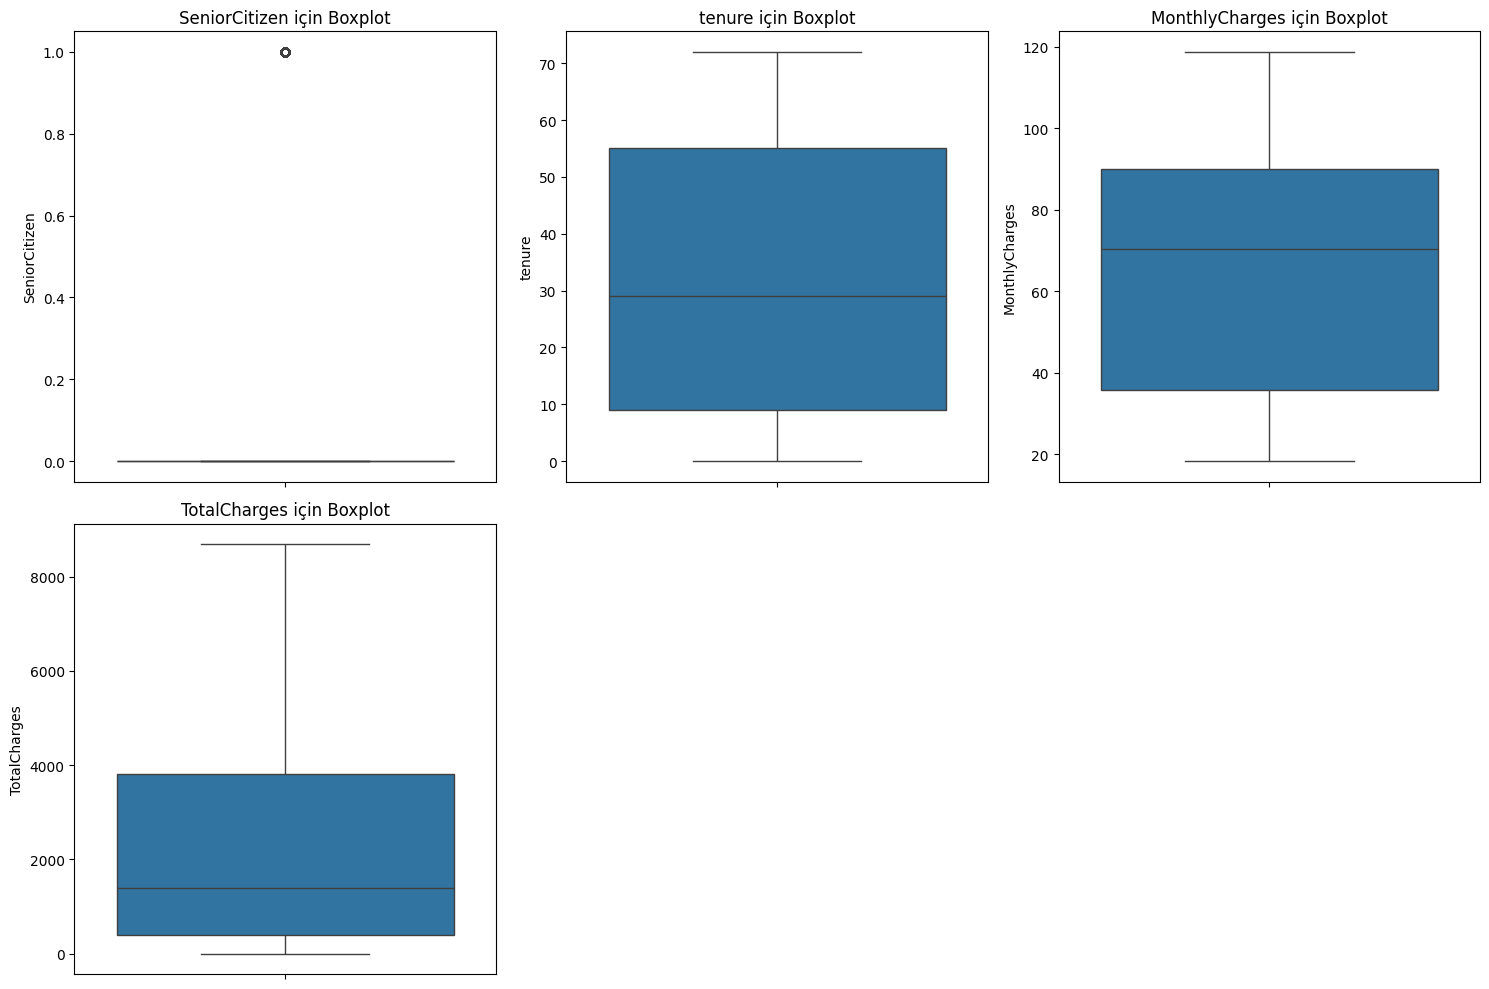

Satır sayısı: 7021


In [ ]:
# Aykırı değer tespiti için IQR yöntemi
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Sayısal sütunlardaki aykırı değerleri tespit edelim ve ardından görselleştirelim
numerical_columns = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns):
    # Aykırı değerleri tespit etme
    outliers = detect_outliers_iqr(df, col)
    print(f"{col} sütunundaki aykırı değer sayısı: {len(outliers)}")

    # Boxplot çizme
    plt.subplot(2, len(numerical_columns)//2 + 1, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"{col} için Boxplot")

plt.tight_layout()
plt.show()

print(f"Satır sayısı: {len(df)}")

SeniorCitizen sütunu ikili (binary) bir sütun olduğu için, bu sütunda 1 değerlerinin aykırı olarak görünmesi, çoğunluğun 0 olması sebebiyle normaldir. Bu durumda, bu değerlerin aykırı olduğunu söylemek teknik olarak doğru değildir; çünkü bunlar sadece daha az yaygın olan normal değerlerdir.
Bu yüzden aykırı değer silme işlemi yapmayacağız.

In [ ]:
# DataFrame'in bir kopyasını oluştur
df_copy = df.copy()

# Churn sütununu ikili formata çevirme ('Yes' -> 1, 'No' -> 0)
df_copy['Churn'] = df_copy['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

Encoding ve Ölçeklendirme işlemlerini yapmak için ön işleme yaptığımız veri setinden bir copy oluşturduk.

Churn hedef sütun olduğu için onu sayısal formata dönüştürdüm.

### **VERİ DÖNÜŞÜMÜ**
#### **ONE HOT ENCODİNG**

In [ ]:
# One-hot encoding uygulama ve boolean değerleri integer'a çevirme
df_copy = pd.get_dummies(df_copy, drop_first=False).astype(int)

# Ağaç tabanlı modellerde ölçeklemeye gerek olmadığından sadece encoding işlemi yeterli
# O yüzden encoding işlemi sonrası ölçekleme yapmadığımız bir copy dataset oluşturduk
# Bu tür modellerde bu 2. kopyayı kullanmak için.
df_copy2 = df_copy.copy()

# Encoding sonrası DataFrame
print(f"Sütun sayısı: {len(df_copy.columns)}")
print(df_copy.head())

Sütun sayısı: 46
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0       1              29            29      0              1   
1              0      34              56          1889      0              0   
2              0       2              53           108      1              0   
3              0      45              42          1840      0              0   
4              0       2              70           151      1              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0            0           0            1              1  ...   
1            1           1            0              1  ...   
2            1           1            0              1  ...   
3            1           1            0              1  ...   
4            0           1            0              1  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1      

####**ÖLÇEKLEME(STANDARTLAŞTIRMA)**

In [ ]:
# Sayısal özelliklerin temel istatistiklerini hesaplayalım
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
statistics = df[numerical_columns].describe()
statistics

,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000
mean,32.469449,64.851894,2286.765026
std,24.534965,30.069001,2266.855057
min,0.000000,18.250000,0.000000
25%,9.000000,35.750000,403.350000
50%,29.000000,70.400000,1400.550000
75%,55.000000,89.900000,3801.700000
max,72.000000,118.750000,8684.800000


Bu istatistik sonuçlara göre nümerik sütunlar arasında ölçek farklılıkları olduğunu görmüş olduk.

tenure sütunu için müşterinin şirketle ilişkisinin süresi ay cinsinden min değeri 0 max değer 72

MonthlyCharges sütunu için aylık ödenen ücretlerin min değeri 18.25 max değeri 118.75

TotalCharges sütunu için müşterinin toplamda ödediği ücret min değeri 0 (hizmet almaya yeni başlayan veya hiç ödeme yapmamış kullanıcıları temsil edebilir) max değeri 8684.80

Burada özellikle **TotalCharges** sütununun geniş bir dağılıma sahip olduğunu görüyoruz.

Buradan elde ettiğimiz bulgulara göre veri dönüşümü yöntemlerinden standartlaştırma yöntemini kullanmamızın daha uygun olduğunu tespit ettik. Eğer veri setimiz benzer ölçeklere sahip olsaydı normalizasyon yöntemini kullanmak model için daha uygun olurdu ama veri setimiz farklı ölçeklerde olduğu için standartlaştırma yöntemini kullanmanın daha uygun olduğuna karar verdik.

Çünkü normalizasyon yöntemi veri setindeki sayısal özellikleri belirli bir aralığa (genellikle 0 ile 1 arasına) sıkıştırır. Bu yöntem, özellikle tüm özelliklerin aynı aralıkta değerlendirilmesi gerektiğinde ve veri setinde aykırı değerlerin olmadığı durumlarda faydalı olabilir. Bu sebeple farklı ölçeklere sahip olan özelliklerimizi 0 ile 1 arasından sıkıştırırken özelliklerin özgün dağılımını ve varyansını korumakta yetersiz kalabilir. Özellikle TotalCharges gibi geniş bir değer aralığına sahip özelliklerde, normalizasyon küçük değişiklikleri göz ardı edebilir ve modelin bu özelliklerden alacağı bilgiyi azaltabilir.

Model olarak biz ilk önce Logistik Regresyon kullanacağımız için bu gibi modeller, özelliklerin varyansını ve standart sapmasını önemser.

Normalizasyon, özelliklerin aralığını sınırlasa da, bu özelliklerin dağılımını ve standart sapmasını korumaz.

Standartlaştırma ise, her bir özelliği ortalama 0 ve standart sapma 1 olacak şekilde dönüştürür, bu da modelin özellikler arası ilişkileri daha doğru bir şekilde öğrenmesine ve yorumlamasına olanak tanır.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standartlaştırıcıyı tanımla
scaler = StandardScaler()

# Sayısal sütunlar için standartlaştırma uygula
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_copy[numerical_features] = scaler.fit_transform(df_copy[numerical_features])

# Standartlaştırma sonrası DataFrame kontrolü
print(df_copy.head())

   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  Churn  \
0              0 -1.282728       -1.176789     -0.995855      0   
1              0  0.062387       -0.278879     -0.175276      0   
2              0 -1.241967       -0.378647     -0.961003      1   
3              0  0.510759       -0.744462     -0.196893      0   
4              0 -1.241967        0.186704     -0.942032      1   

   gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0              1            0           0            1              1  ...   
1              0            1           1            0              1  ...   
2              0            1           1            0              1  ...   
3              0            1           1            0              1  ...   
4              1            0           1            0              1  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1           

Negatif değerler, bir müşterinin o özelliğin ortalamasının altında olduğunu gösterir, pozitif değerler ise ortalamanın üzerinde olduğunu ifade eder.

#**EDA(KEŞİFSEL VERİ ANALİZİ)**

###**SAYISAL DEĞİŞKENLERİN DAĞILIMINI İNCELEME**
#### BU SÜTUNLARIN BİRBİRLERİ İLE OLAN İLİŞKİLERİNİ GÖZ ÖNÜNDE BULUNDURARAK MODELE OLAN ETKİLERİNE DİKKAT ÇEKMELİYİZ !

####YORUMLAR EKSİK OLABİLİR , AKLIMA GELDİKÇE DÜŞÜNDÜKÇE EKLEYECEĞİM.

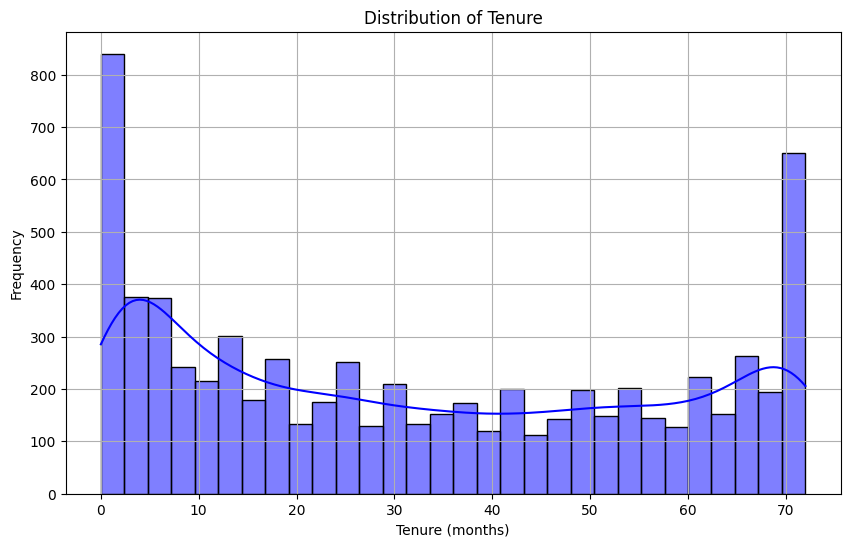

In [ ]:
# 'tenure' sütununun dağılımını inceleyelim
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure'], kde=True, bins=30, color='blue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Başlangıçta yeni abone olan müşteri sayısının fazla olması modelde churn olasılığını arttırabilir.
Ancak müşterinin şirkette kalma süresi arttıkça şirkete olan bağlılığını ve sadakatini gösterir. Bu da müşterinin şirketten ayrılma olasığını azaltır.

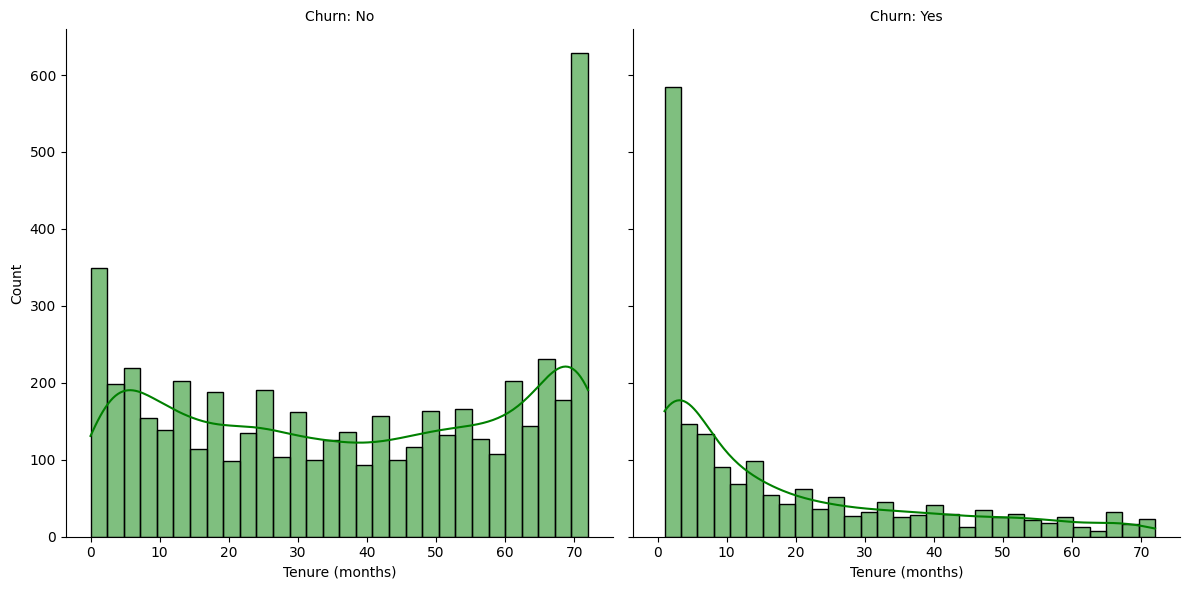

,tenure
Churn,
No,5164
Yes,1857


In [ ]:
# 'tenure' sütununun 'Churn' ile ilişkisini farklı bir grafikle göstermek için FacetGrid kullanarak histogramlar çizelim
g = sns.FacetGrid(df, col="Churn", height=6, aspect=1)
g.map_dataframe(sns.histplot, x="tenure", bins=30, kde=True, color='green')
g.set_axis_labels("Tenure (months)", "Count")
g.set_titles("Churn: {col_name}")
plt.show()

# 'Churn' durumuna göre 'tenure' değerlerinin sayısını hesaplamak için groupby ve count kullanalım
tenure_counts = df.groupby('Churn')['tenure'].count()
tenure_counts

Churn ile olan ilişkisini incelediğimizde de churn olmayan müşterilerin şirkette kalma süresi arttıkça şirketten ayrılma olasığının azaldığını anlarız. Churn olan müşterilere bakacak olursak şirkete yeni abone olan yani daha az sürede bulunan müşterilerin churn olma olasılığının arttığını anlarız.

Model için özellikle şirkete yeni abone olan müşteriler ve şirkete uzun süredir abone olan müşterilere önem göstermeliyiz.

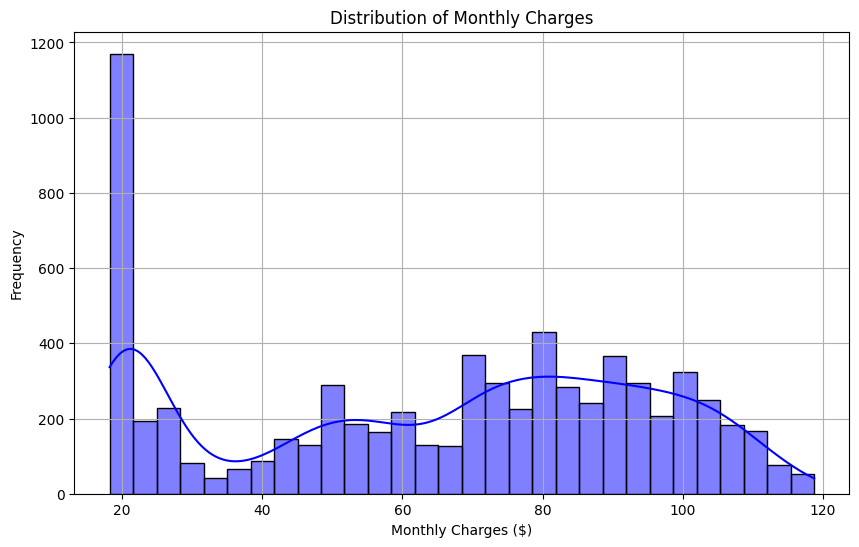

,MonthlyCharges
MonthlyCharges,
"(0, 20]",653
"(20, 40]",1171
"(40, 60]",1078
"(60, 80]",1453
"(80, 100]",1764
"(100, 120]",902


In [ ]:
# 'MonthlyCharges' sütununun dağılımını inceleyelim
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], kde=True, bins=30, color='blue')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 'MonthlyCharges' sütununun yoğunluk bölgelerini belirlemek ve bu bölgelerdeki müşteri sayısını hesaplamak için value_counts kullanabiliriz
# Önce, müşterilerin yoğun olduğu bölgeleri belirlemek için MonthlyCharges sütununu belirli aralıklara ayıralım
charge_bins = pd.cut(df['MonthlyCharges'], bins=[0, 20, 40, 60, 80, 100, 120])
charge_density_counts = df.groupby(charge_bins, observed=True)['MonthlyCharges'].count()
charge_density_counts

Aylık daha düşük ücret ödeyen müşteri sayısının fazla olması şirkete yeni abone olan müşterileri temsil ediyor olabilir.
Bu ikisi arasında bir ilişki olabilir model kısmında bu sütunun birbiri ile olan ilişkisini de göz önünde bulundurmalıyız.

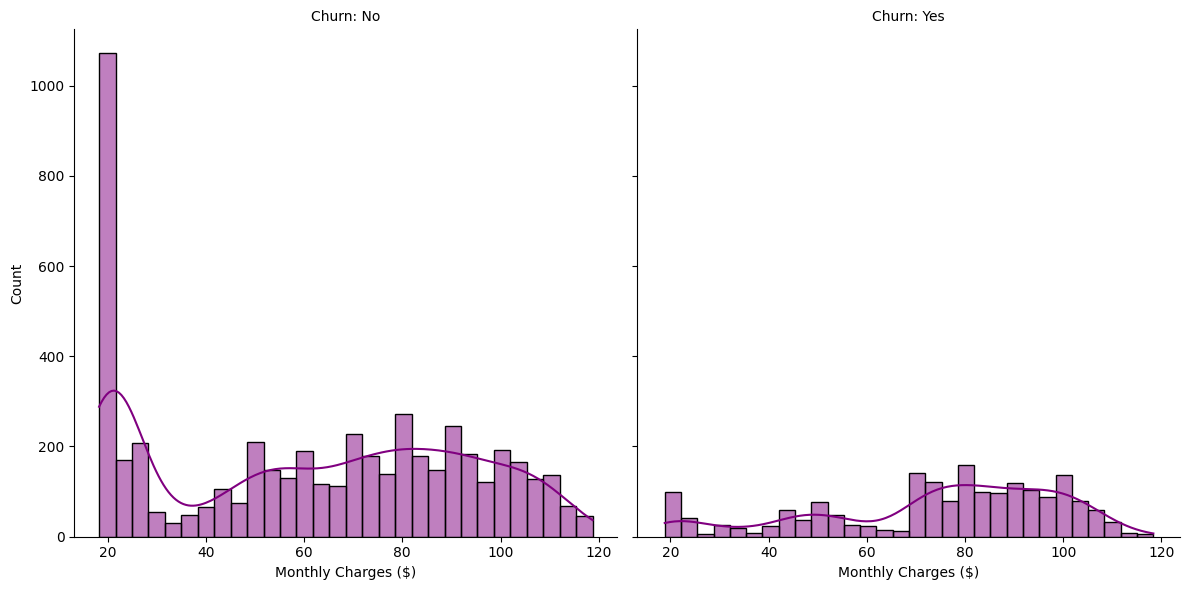

,MonthlyCharges
Churn,
No,5164
Yes,1857


In [ ]:
# 'MonthlyCharges' sütununun 'Churn' ile ilişkisini farklı bir grafikle göstermek için FacetGrid kullanarak histogramlar çizelim
g = sns.FacetGrid(df, col="Churn", height=6, aspect=1)
g.map_dataframe(sns.histplot, x="MonthlyCharges", bins=30, kde=True, color='purple')
g.set_axis_labels("Monthly Charges ($)", "Count")
g.set_titles("Churn: {col_name}")
plt.show()

# 'Churn' durumuna göre 'MonthlyCharges' değerlerinin sayısını hesaplamak için groupby ve count kullanalım
monthly_charges_counts = df.groupby('Churn')['MonthlyCharges'].count()
monthly_charges_counts

Şirketten ayrılmayan müşterilerin çoğunluğunun aylık düşük ücret ödeyen müşteriler olduğunu görebiliriz.
Fakat yüksek ücret ödeyen müşterilen hem churn hem churn olmadıklarını da anlayabiliriz. Bu da bazı müşterilerin kullandığı yüksek tarifeli paketlerden memnun olduklarını ve ayrılmak istemediklerini diyebiliriz.

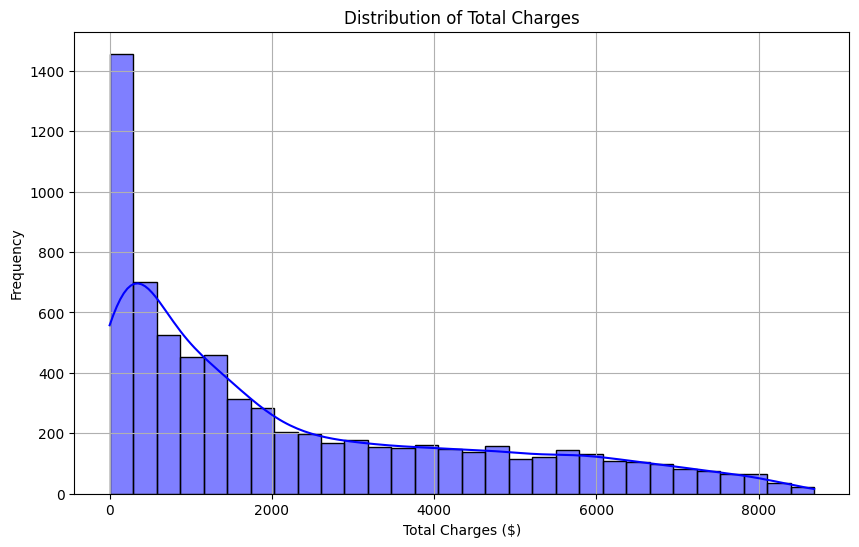

In [ ]:
# 'TotalCharges' sütununun dağılımını inceleyelim
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalCharges'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Müşterilerin daha düşük toplam ücretlerde daha yoğun olduğunu görürüz.

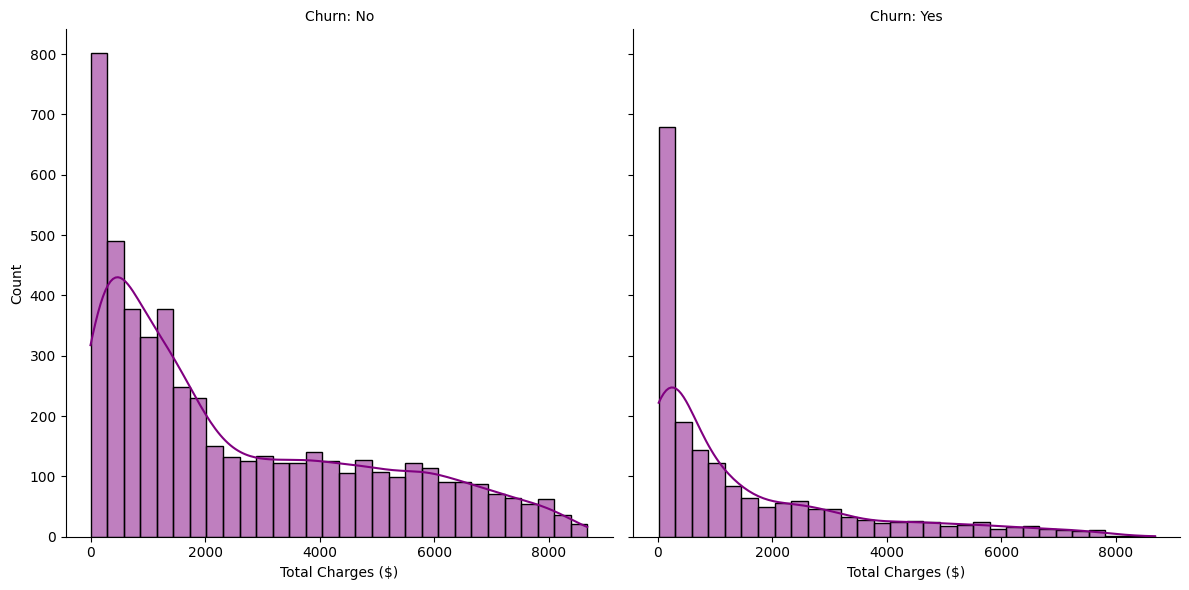

,TotalCharges
Churn,
No,5164
Yes,1857


In [ ]:
# 'TotalCharges' sütununun 'Churn' ile ilişkisini farklı bir grafikle göstermek için FacetGrid kullanarak histogramlar çizelim
g = sns.FacetGrid(df, col="Churn", height=6, aspect=1)
g.map_dataframe(sns.histplot, x="TotalCharges", bins=30, kde=True, color='purple')
g.set_axis_labels("Total Charges ($)", "Count")
g.set_titles("Churn: {col_name}")
plt.show()

# 'Churn' durumuna göre 'TotalCharges' değerlerinin sayısını hesaplamak için groupby ve count kullanalım
total_charges_counts = df.groupby('Churn')['TotalCharges'].count()
total_charges_counts

Churn olmayan müşterilerin çoğunluğunun daha düşük toplam ücretlerde yoğunlaştını görmüş oluruz.

Modelde churn olmayan müşterilen çoğunluğunun toplam daha düşük ücretlerde yoğunlaşabildiğini görebiliriz.

SeniorCitizen
0    5880
1    1141
Name: count, dtype: int64


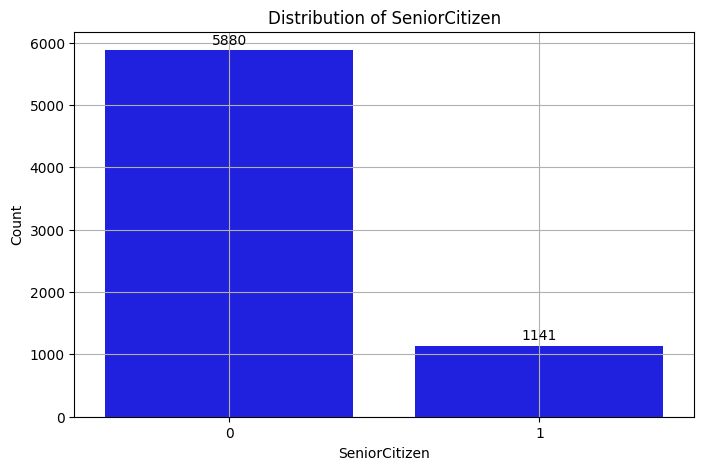

In [ ]:
# 'SeniorCitizen' sütununun benzersiz değerlerini ve bu değerlerin sayısını yazdıralım
seniorCitizen_counts = df['SeniorCitizen'].value_counts()
print(seniorCitizen_counts)

# 'SeniorCitizen' sütununun dağılımını görselleştirelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='SeniorCitizen', data=df, color='blue')
plt.title('Distribution of SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

Çoğunluk genç (0) tir. Yaşlı olan müşterilerin olması churn olasığını arttırabilir. Çünkü teknolojiden uzak, bilgi sahibi olmayabilirler. Bu da telefon kullanma olasılığını azaltabilir. Ancak genç nüfusun fazla olması churn olasılığını azaltır anlamına da gelmez. Çünkü genç olup şirketten ayrılma eğiliminde olan müşteriler olabilir.

Churn            No   Yes
SeniorCitizen            
0              4498  1382
1               666   475


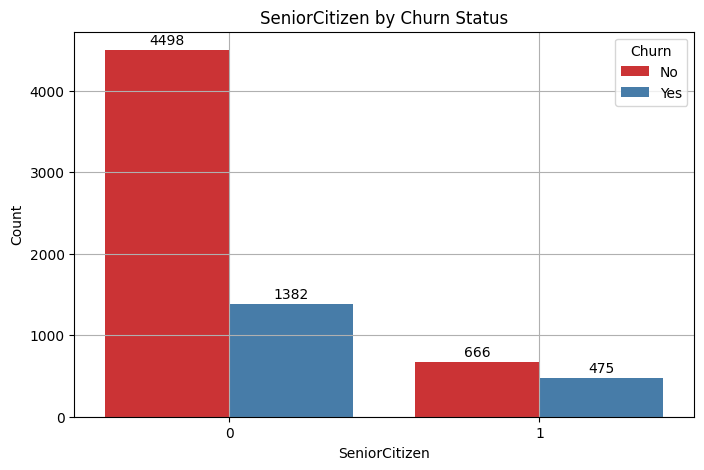

In [ ]:
# 'SeniorCitizen' ve 'Churn' ilişkisindeki sayıları print ile yazdırmak için
seniorCitizen_churn_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
print(seniorCitizen_churn_counts)

# 'SeniorCitizen' sütununun 'Churn' ile ilişkisini gösteren bir grafik çizelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='Set1')
plt.title('SeniorCitizen by Churn Status')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
  if p.get_height() > 0:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

genç olan müşterilerin yaklaşık %24 ü churn iken

yaşlı müşterilerde ise churn oranı yaklaşık %41 dir.

Bu da modelin eğitilirken yaşlı müşterilere ait churn oranının dikkate alınarak eğitilmesi önemli olabilir.

###**KATEGORİK DEĞİŞKENLERİN DAĞILIMINI İNCELEME**

gender
Male      3541
Female    3480
Name: count, dtype: int64


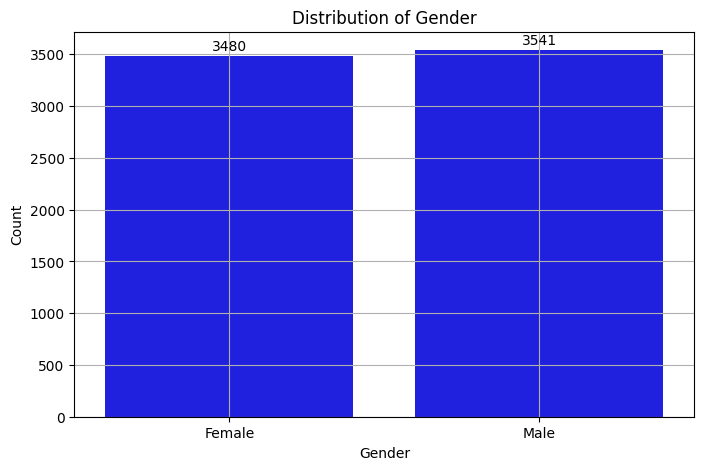

In [ ]:
# 'gender' sütununun benzersiz değerlerini ve bu değerlerin sayısını yazdıralım
gender_counts = df['gender'].value_counts()
print(gender_counts)

# 'gender' sütununun dağılımını görselleştirelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='gender', data=df, color='blue')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

Churn     No  Yes
gender           
Female  2546  934
Male    2618  923


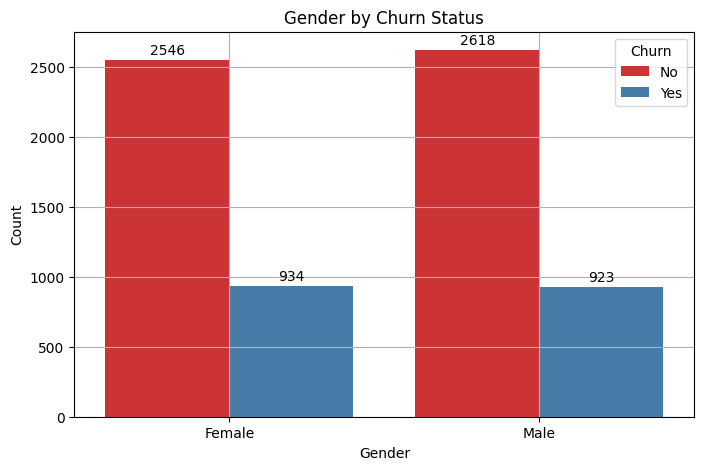

In [ ]:
# 'gender' ve 'Churn' ilişkisindeki sayıları print ile yazdırmak için
gender_churn_counts = df.groupby(['gender', 'Churn']).size().unstack()
print(gender_churn_counts)

# 'gender' sütununun 'Churn' ile ilişkisini gösteren bir grafik çizelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='gender', hue='Churn', data=df, palette='Set1')
plt.title('Gender by Churn Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
  if p.get_height() > 0:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

Partner
No     3619
Yes    3402
Name: count, dtype: int64


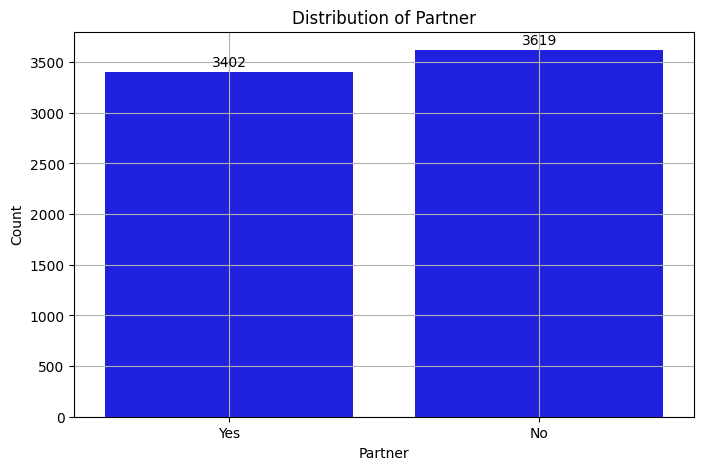

In [ ]:
# 'Partner' sütununun benzersiz değerlerini ve bu değerlerin sayısını yazdıralım
partner_counts = df['Partner'].value_counts()
print(partner_counts)

# 'Partner' sütununun dağılımını görselleştirelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Partner', data=df, color='blue')
plt.title('Distribution of Partner')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

Churn      No   Yes
Partner            
No       2431  1188
Yes      2733   669


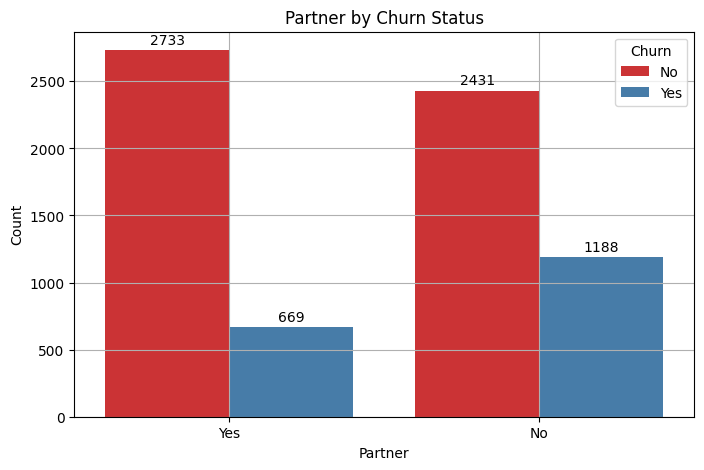

In [ ]:
# 'Partner' ve 'Churn' ilişkisindeki sayıları print ile yazdırmak için
partner_churn_counts = df.groupby(['Partner', 'Churn']).size().unstack()
print(partner_churn_counts)

# 'Partner' sütununun 'Churn' ile ilişkisini gösteren bir grafik çizelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Partner', hue='Churn', data=df, palette='Set1')
plt.title('Partner by Churn Status')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
  if p.get_height() > 0:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

Dependents
No     4911
Yes    2110
Name: count, dtype: int64


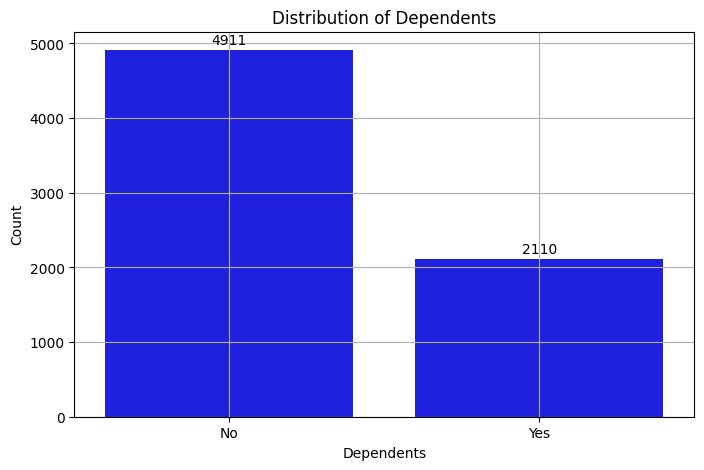

In [ ]:
# 'Dependents' sütununun benzersiz değerlerini ve bu değerlerin sayısını yazdıralım
dependents_counts = df['Dependents'].value_counts()
print(dependents_counts)

# 'Dependents' sütununun dağılımını görselleştirelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Dependents', data=df, color='blue')
plt.title('Distribution of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

Churn         No   Yes
Dependents            
No          3380  1531
Yes         1784   326


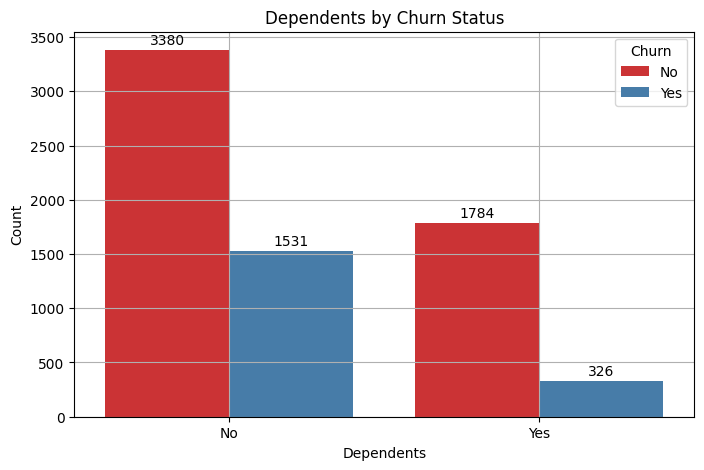

In [ ]:
# 'Dependents' ve 'Churn' ilişkisindeki sayıları print ile yazdırmak için
dependents_churn_counts = df.groupby(['Dependents', 'Churn']).size().unstack()
print(dependents_churn_counts)

# 'Dependents' sütununun 'Churn' ile ilişkisini gösteren bir grafik çizelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Dependents', hue='Churn', data=df, palette='Set1')
plt.title('Dependents by Churn Status')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
  if p.get_height() > 0:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

PhoneService
Yes    6339
No      682
Name: count, dtype: int64


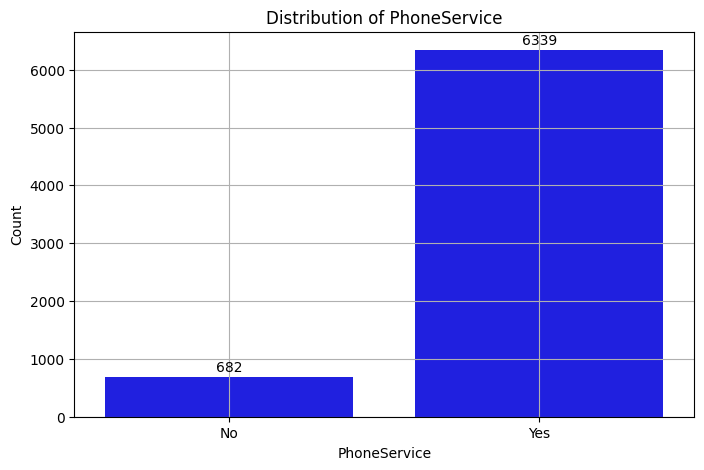

In [ ]:
# 'PhoneService' sütununun benzersiz değerlerini ve bu değerlerin sayısını yazdıralım
phoneService_counts = df['PhoneService'].value_counts()
print(phoneService_counts)

# 'PhoneService' sütununun dağılımını görselleştirelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='PhoneService', data=df, color='blue')
plt.title('Distribution of PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Count')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

Churn           No   Yes
PhoneService            
No             512   170
Yes           4652  1687


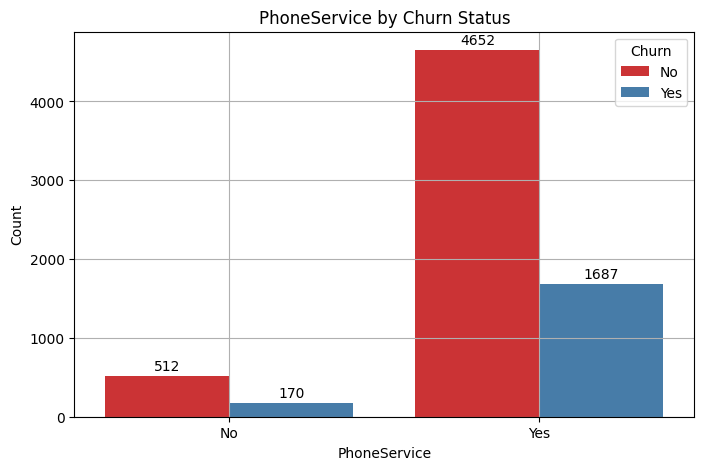

In [ ]:
# 'PhoneService' ve 'Churn' ilişkisindeki sayıları print ile yazdırmak için
phoneService_churn_counts = df.groupby(['PhoneService', 'Churn']).size().unstack()
print(phoneService_churn_counts)

# 'PhoneService' sütununun 'Churn' ile ilişkisini gösteren bir grafik çizelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='PhoneService', hue='Churn', data=df, palette='Set1')
plt.title('PhoneService by Churn Status')
plt.xlabel('PhoneService')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
  if p.get_height() > 0:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64


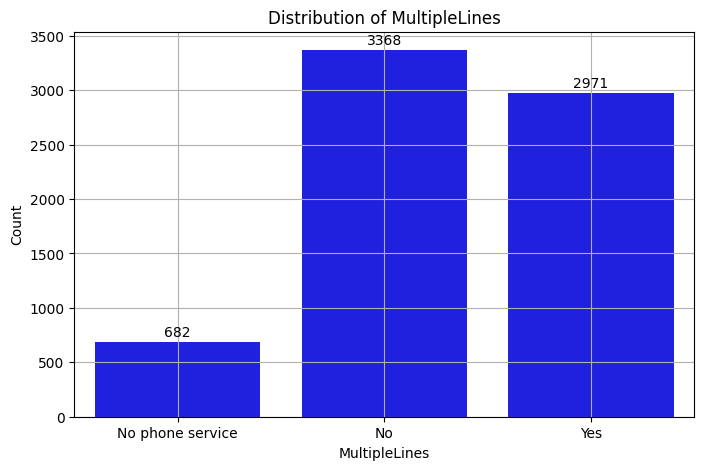

In [ ]:
# 'MultipleLines' sütununun benzersiz değerlerini ve bu değerlerin sayısını yazdıralım
multipleLines_counts = df['MultipleLines'].value_counts()
print(multipleLines_counts)

# 'MultipleLines' sütununun dağılımını görselleştirelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='MultipleLines', data=df, color='blue')
plt.title('Distribution of MultipleLines')
plt.xlabel('MultipleLines')
plt.ylabel('Count')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

Churn               No  Yes
MultipleLines              
No                2531  837
No phone service   512  170
Yes               2121  850


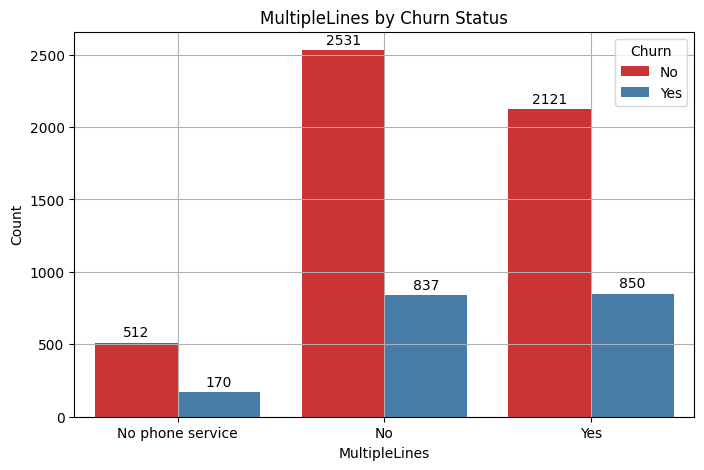

In [ ]:
# 'MultipleLines' ve 'Churn' ilişkisindeki sayıları print ile yazdırmak için
multipleLines_churn_counts = df.groupby(['MultipleLines', 'Churn']).size().unstack()
print(multipleLines_churn_counts)

# 'MultipleLines' sütununun 'Churn' ile ilişkisini gösteren bir grafik çizelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='MultipleLines', hue='Churn', data=df, palette='Set1')
plt.title('MultipleLines by Churn Status')
plt.xlabel('MultipleLines')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
  if p.get_height() > 0:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64


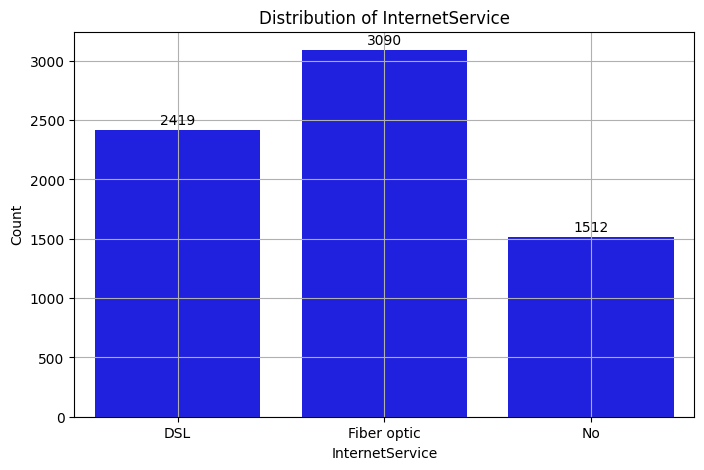

In [ ]:
# 'InternetService' sütununun benzersiz değerlerini ve bu değerlerin sayısını yazdıralım
internetService_counts = df['InternetService'].value_counts()
print(internetService_counts)

# 'InternetService' sütununun dağılımını görselleştirelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='InternetService', data=df, color='blue')
plt.title('Distribution of InternetService')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

Churn              No   Yes
InternetService            
DSL              1962   457
Fiber optic      1799  1291
No               1403   109


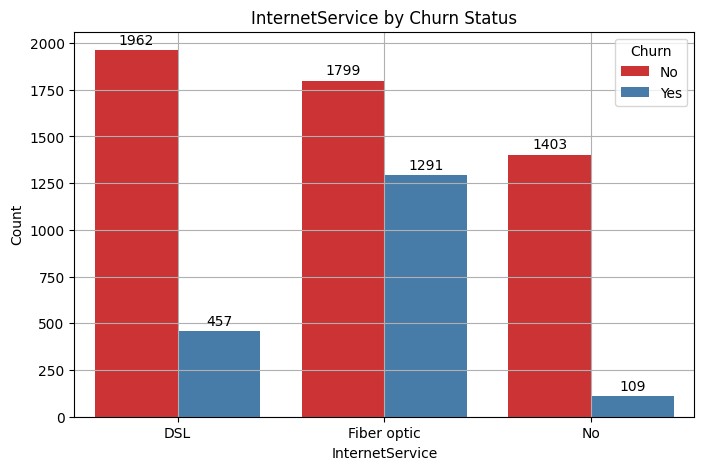

In [ ]:
# 'InternetService' ve 'Churn' ilişkisindeki sayıları print ile yazdırmak için
internetService_churn_counts = df.groupby(['InternetService', 'Churn']).size().unstack()
print(internetService_churn_counts)

# 'InternetService' sütununun 'Churn' ile ilişkisini gösteren bir grafik çizelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='InternetService', hue='Churn', data=df, palette='Set1')
plt.title('InternetService by Churn Status')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
  if p.get_height() > 0:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: count, dtype: int64


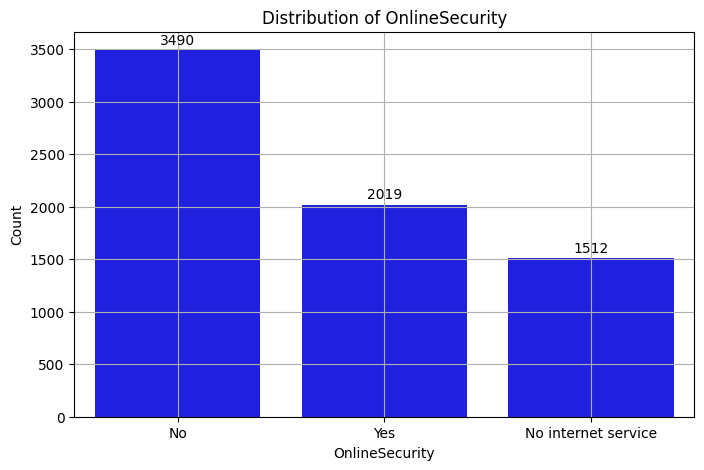

In [ ]:
# 'OnlineSecurity' sütununun benzersiz değerlerini ve bu değerlerin sayısını yazdıralım
onlineSecurity_counts = df['OnlineSecurity'].value_counts()
print(onlineSecurity_counts)

# 'OnlineSecurity' sütununun dağılımını görselleştirelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='OnlineSecurity', data=df, color='blue')
plt.title('Distribution of OnlineSecurity')
plt.xlabel('OnlineSecurity')
plt.ylabel('Count')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

Churn                  No   Yes
OnlineSecurity                 
No                   2037  1453
No internet service  1403   109
Yes                  1724   295


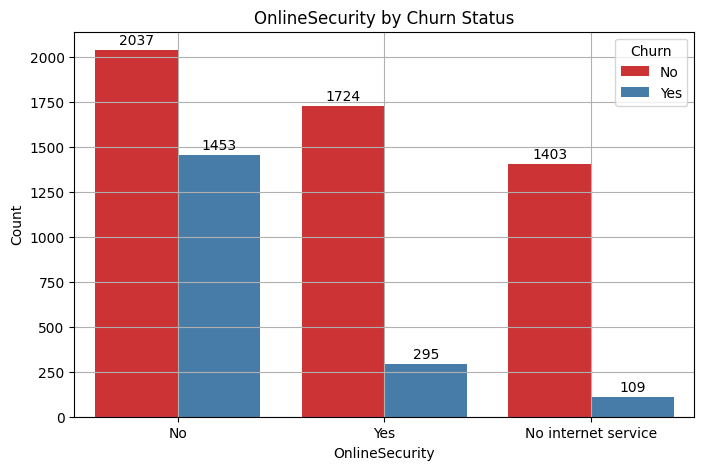

In [ ]:
# 'OnlineSecurity' ve 'Churn' ilişkisindeki sayıları print ile yazdırmak için
onlineSecurity_churn_counts = df.groupby(['OnlineSecurity', 'Churn']).size().unstack()
print(onlineSecurity_churn_counts)

# 'OnlineSecurity' sütununun 'Churn' ile ilişkisini gösteren bir grafik çizelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='OnlineSecurity', hue='Churn', data=df, palette='Set1')
plt.title('OnlineSecurity by Churn Status')
plt.xlabel('OnlineSecurity')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
  if p.get_height() > 0:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: count, dtype: int64


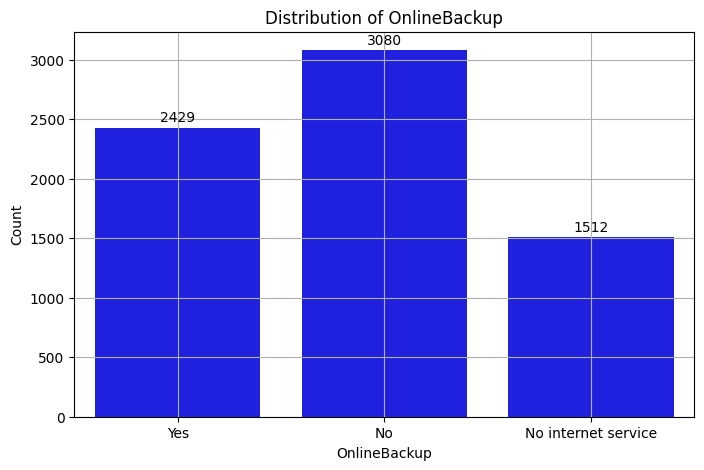

In [ ]:
# 'OnlineBackup' sütununun benzersiz değerlerini ve bu değerlerin sayısını yazdıralım
onlineBackup_counts = df['OnlineBackup'].value_counts()
print(onlineBackup_counts)

# 'OnlineBackup' sütununun dağılımını görselleştirelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='OnlineBackup', data=df, color='blue')
plt.title('Distribution of OnlineBackup')
plt.xlabel('OnlineBackup')
plt.ylabel('Count')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

Churn                  No   Yes
OnlineBackup                   
No                   1855  1225
No internet service  1403   109
Yes                  1906   523


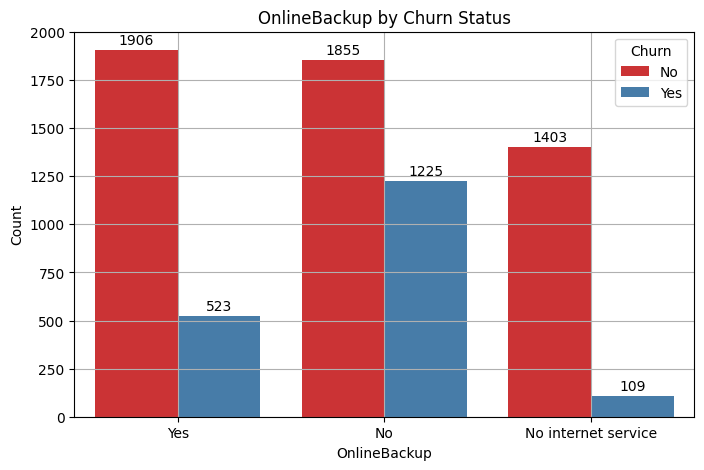

In [ ]:
# 'OnlineBackup' ve 'Churn' ilişkisindeki sayıları print ile yazdırmak için
onlineBackup_churn_counts = df.groupby(['OnlineBackup', 'Churn']).size().unstack()
print(onlineBackup_churn_counts)

# 'OnlineBackup' sütununun 'Churn' ile ilişkisini gösteren bir grafik çizelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='OnlineBackup', hue='Churn', data=df, palette='Set1')
plt.title('OnlineBackup by Churn Status')
plt.xlabel('OnlineBackup')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
  if p.get_height() > 0:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: count, dtype: int64


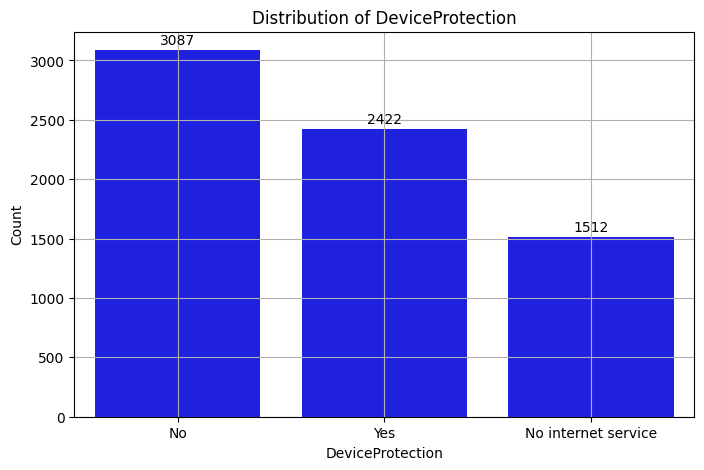

In [ ]:
# 'DeviceProtection' sütununun benzersiz değerlerini ve bu değerlerin sayısını yazdıralım
deviceProtection_counts = df['DeviceProtection'].value_counts()
print(deviceProtection_counts)

# 'DeviceProtection' sütununun dağılımını görselleştirelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='DeviceProtection', data=df, color='blue')
plt.title('Distribution of DeviceProtection')
plt.xlabel('DeviceProtection')
plt.ylabel('Count')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

Churn                  No   Yes
DeviceProtection               
No                   1884  1203
No internet service  1403   109
Yes                  1877   545


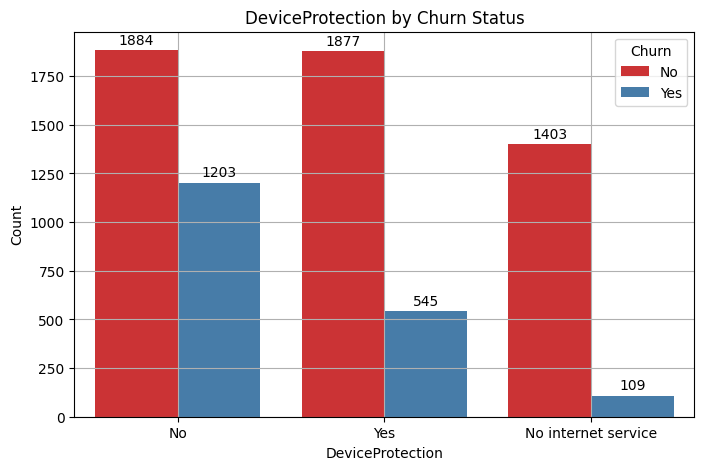

In [ ]:
# 'DeviceProtection' ve 'Churn' ilişkisindeki sayıları print ile yazdırmak için
deviceProtection_churn_counts = df.groupby(['DeviceProtection', 'Churn']).size().unstack()
print(deviceProtection_churn_counts)

# 'DeviceProtection' sütununun 'Churn' ile ilişkisini gösteren bir grafik çizelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='DeviceProtection', hue='Churn', data=df, palette='Set1')
plt.title('DeviceProtection by Churn Status')
plt.xlabel('DeviceProtection')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
  if p.get_height() > 0:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

TechSupport
No                     3465
Yes                    2044
No internet service    1512
Name: count, dtype: int64


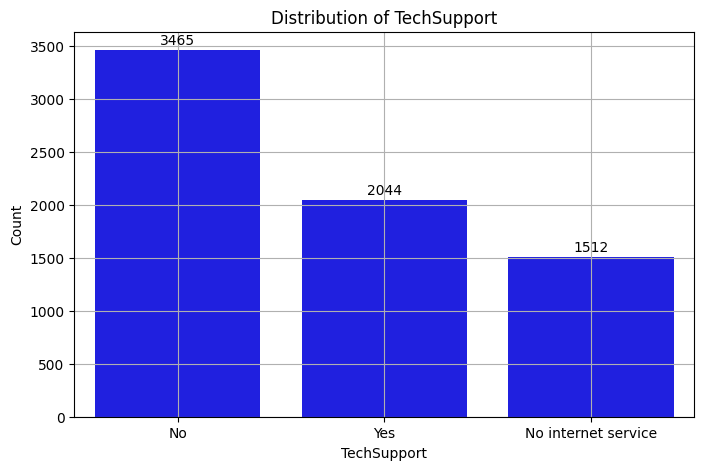

In [ ]:
# 'TechSupport' sütununun benzersiz değerlerini ve bu değerlerin sayısını yazdıralım
techSupport_counts = df['TechSupport'].value_counts()
print(techSupport_counts)

# 'TechSupport' sütununun dağılımını görselleştirelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='TechSupport', data=df, color='blue')
plt.title('Distribution of TechSupport')
plt.xlabel('TechSupport')
plt.ylabel('Count')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

Churn                  No   Yes
TechSupport                    
No                   2027  1438
No internet service  1403   109
Yes                  1734   310


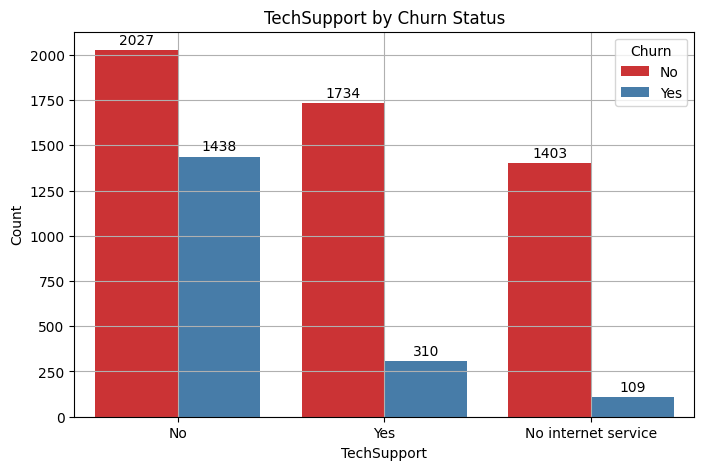

In [ ]:
# 'TechSupport' ve 'Churn' ilişkisindeki sayıları print ile yazdırmak için
techSupport_churn_counts = df.groupby(['TechSupport', 'Churn']).size().unstack()
print(techSupport_churn_counts)

# 'TechSupport' sütununun 'Churn' ile ilişkisini gösteren bir grafik çizelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='TechSupport', hue='Churn', data=df, palette='Set1')
plt.title('TechSupport by Churn Status')
plt.xlabel('TechSupport')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
  if p.get_height() > 0:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

StreamingTV
No                     2802
Yes                    2707
No internet service    1512
Name: count, dtype: int64


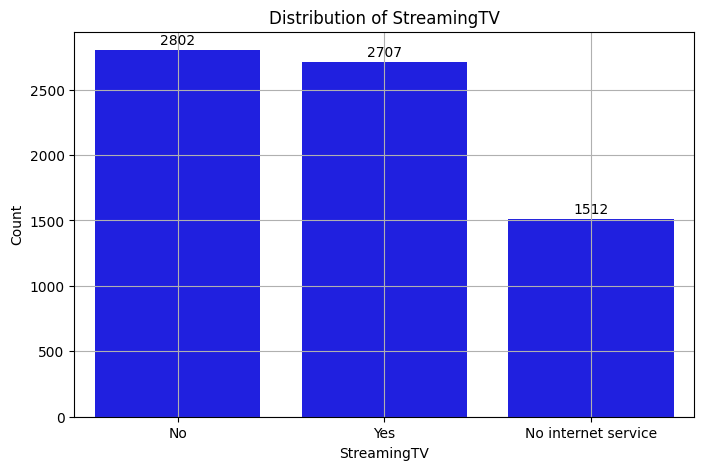

In [ ]:
# 'StreamingTV' sütununun benzersiz değerlerini ve bu değerlerin sayısını yazdıralım
streamingTV_counts = df['StreamingTV'].value_counts()
print(streamingTV_counts)

# 'StreamingTV' sütununun dağılımını görselleştirelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='StreamingTV', data=df, color='blue')
plt.title('Distribution of StreamingTV')
plt.xlabel('StreamingTV')
plt.ylabel('Count')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

Churn                  No  Yes
StreamingTV                   
No                   1868  934
No internet service  1403  109
Yes                  1893  814


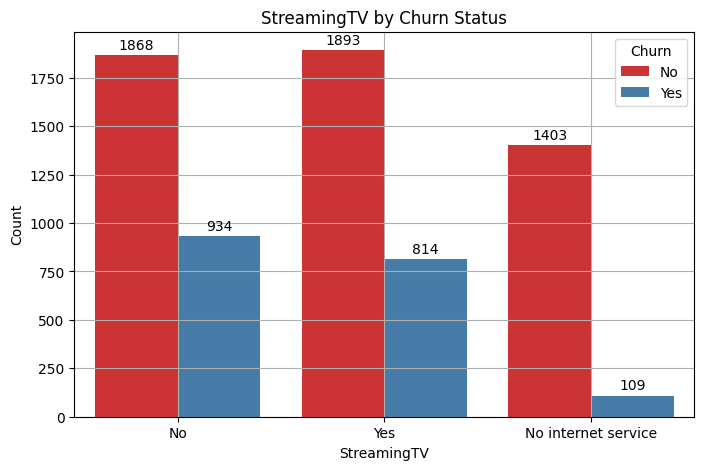

In [ ]:
# 'StreamingTV' ve 'Churn' ilişkisindeki sayıları print ile yazdırmak için
streamingTV_churn_counts = df.groupby(['StreamingTV', 'Churn']).size().unstack()
print(streamingTV_churn_counts)

# 'StreamingTV' sütununun 'Churn' ile ilişkisini gösteren bir grafik çizelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='StreamingTV', hue='Churn', data=df, palette='Set1')
plt.title('StreamingTV by Churn Status')
plt.xlabel('StreamingTV')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
  if p.get_height() > 0:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

StreamingMovies
No                     2777
Yes                    2732
No internet service    1512
Name: count, dtype: int64


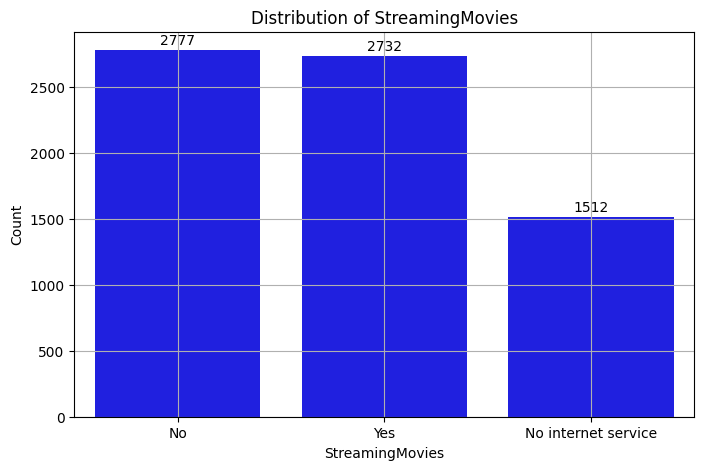

In [ ]:
# 'StreamingMovies' sütununun benzersiz değerlerini ve bu değerlerin sayısını yazdıralım
streamingMovies_counts = df['StreamingMovies'].value_counts()
print(streamingMovies_counts)

# 'StreamingMovies' sütununun dağılımını görselleştirelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='StreamingMovies', data=df, color='blue')
plt.title('Distribution of StreamingMovies')
plt.xlabel('StreamingMovies')
plt.ylabel('Count')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

Churn                  No  Yes
StreamingMovies               
No                   1847  930
No internet service  1403  109
Yes                  1914  818


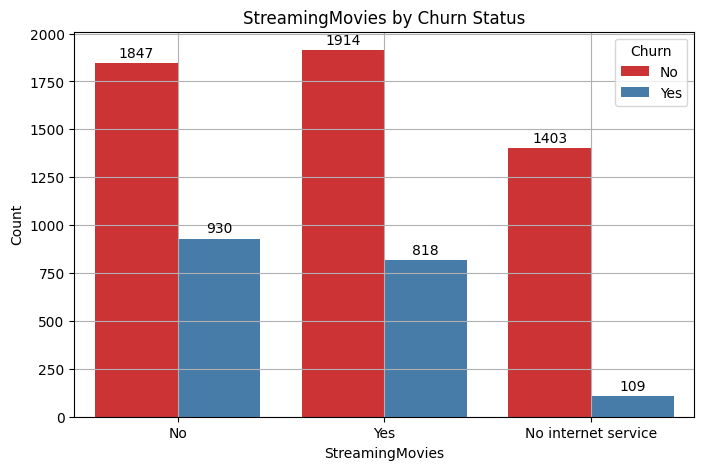

In [ ]:
# 'StreamingMovies' ve 'Churn' ilişkisindeki sayıları print ile yazdırmak için
streamingMovies_churn_counts = df.groupby(['StreamingMovies', 'Churn']).size().unstack()
print(streamingMovies_churn_counts)

# 'StreamingMovies' sütununun 'Churn' ile ilişkisini gösteren bir grafik çizelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='StreamingMovies', hue='Churn', data=df, palette='Set1')
plt.title('StreamingMovies by Churn Status')
plt.xlabel('StreamingMovies')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
  if p.get_height() > 0:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

Contract
Month-to-month    3853
Two year          1695
One year          1473
Name: count, dtype: int64


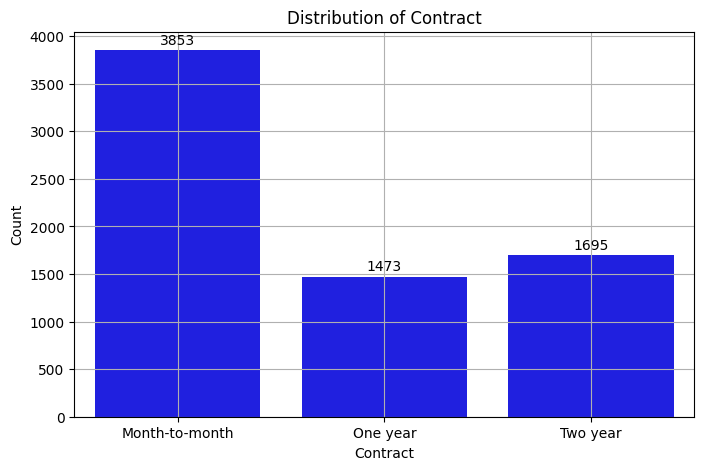

In [ ]:
# 'Contract' sütununun benzersiz değerlerini ve bu değerlerin sayısını yazdıralım
contract_counts = df['Contract'].value_counts()
print(contract_counts)

# 'Contract' sütununun dağılımını görselleştirelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Contract', data=df, color='blue')
plt.title('Distribution of Contract')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

Churn             No   Yes
Contract                  
Month-to-month  2210  1643
One year        1307   166
Two year        1647    48


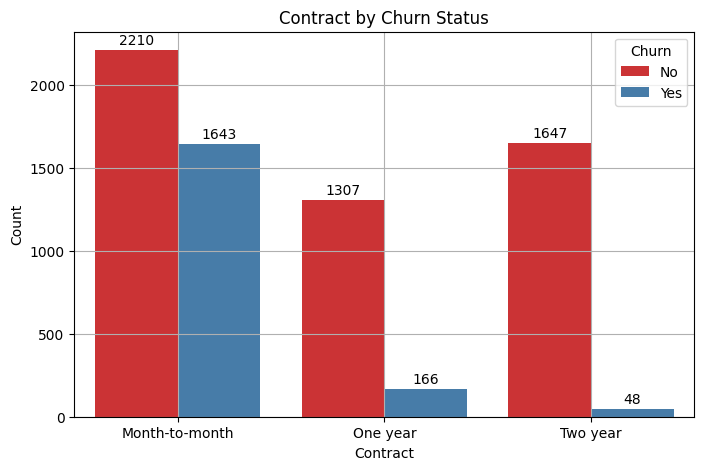

In [ ]:
# 'Contract' ve 'Churn' ilişkisindeki sayıları print ile yazdırmak için
contract_churn_counts = df.groupby(['Contract', 'Churn']).size().unstack()
print(contract_churn_counts)

# 'Contract' sütununun 'Churn' ile ilişkisini gösteren bir grafik çizelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Contract', hue='Churn', data=df, palette='Set1')
plt.title('Contract by Churn Status')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
  if p.get_height() > 0:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

PaperlessBilling
Yes    4161
No     2860
Name: count, dtype: int64


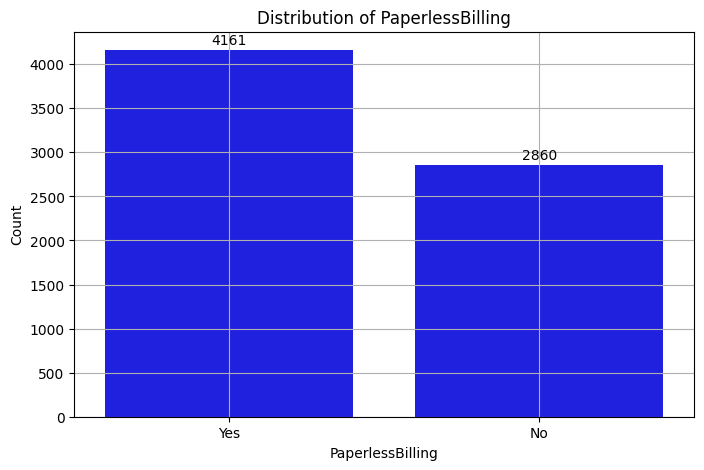

In [ ]:
# 'PaperlessBilling' sütununun benzersiz değerlerini ve bu değerlerin sayısını yazdıralım
paperlessBilling_counts = df['PaperlessBilling'].value_counts()
print(paperlessBilling_counts)

# 'PaperlessBilling' sütununun dağılımını görselleştirelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='PaperlessBilling', data=df, color='blue')
plt.title('Distribution of PaperlessBilling')
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

Churn               No   Yes
PaperlessBilling            
No                2394   466
Yes               2770  1391


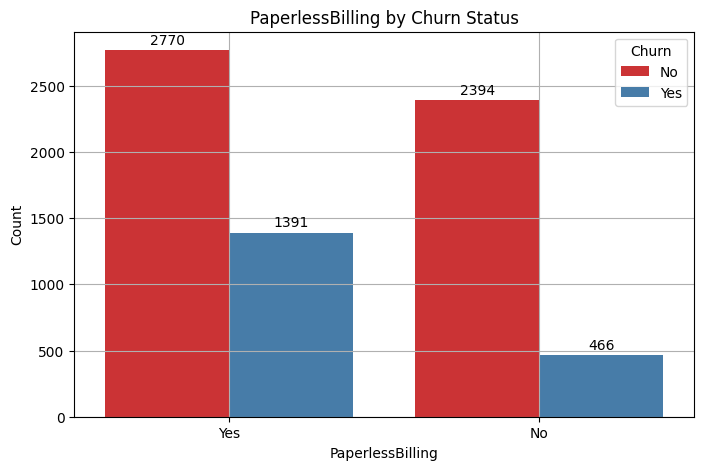

In [ ]:
# 'PaperlessBilling' ve 'Churn' ilişkisindeki sayıları print ile yazdırmak için
paperlessBilling_churn_counts = df.groupby(['PaperlessBilling', 'Churn']).size().unstack()
print(paperlessBilling_churn_counts)

# 'PaperlessBilling' sütununun 'Churn' ile ilişkisini gösteren bir grafik çizelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='PaperlessBilling', hue='Churn', data=df, palette='Set1')
plt.title('PaperlessBilling by Churn Status')
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
  if p.get_height() > 0:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

PaymentMethod
Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


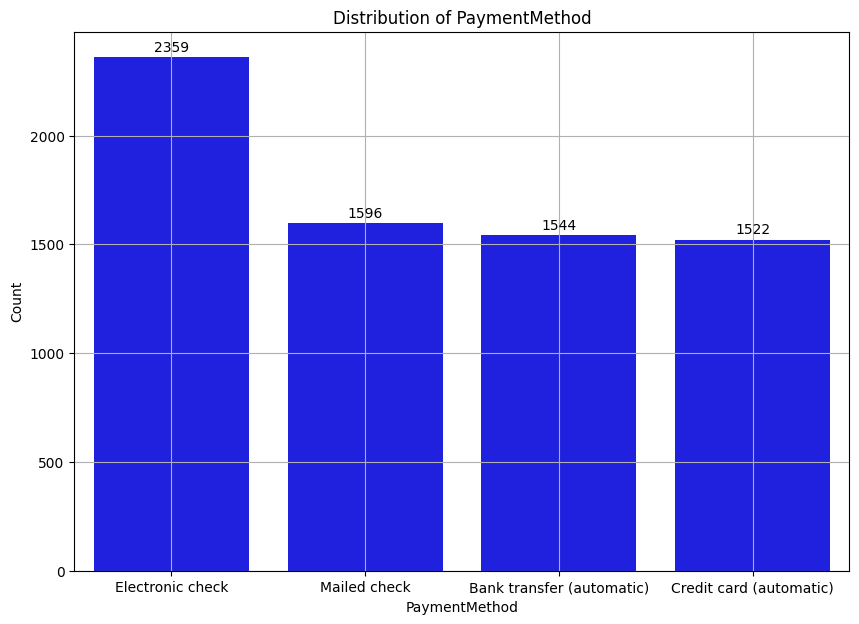

In [ ]:
# 'PaymentMethod' sütununun benzersiz değerlerini ve bu değerlerin sayısını yazdıralım
paymentMethod_counts = df['PaymentMethod'].value_counts()
print(paymentMethod_counts)

# 'PaymentMethod' sütununun dağılımını görselleştirelim
plt.figure(figsize=(10, 7))
ax = sns.countplot(x='PaymentMethod', data=df, color='blue')
plt.title('Distribution of PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Count')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1065
Mailed check               1294   302


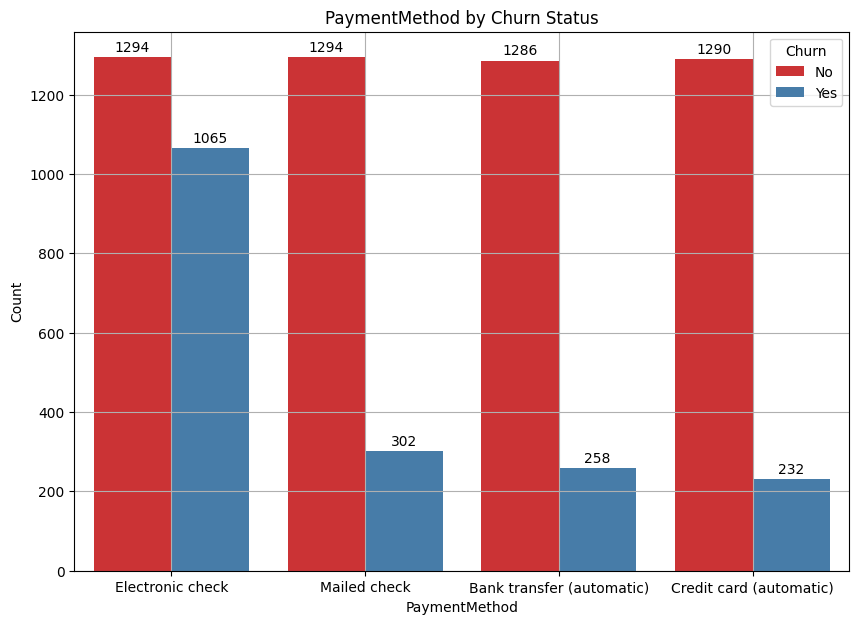

In [ ]:
# 'PaymentMethod' ve 'Churn' ilişkisindeki sayıları print ile yazdırmak için
paymentMethod_churn_counts = df.groupby(['PaymentMethod', 'Churn']).size().unstack()
print(paymentMethod_churn_counts)

# 'PaymentMethod' sütununun 'Churn' ile ilişkisini gösteren bir grafik çizelim
plt.figure(figsize=(10, 7))
ax = sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='Set1')
plt.title('PaymentMethod by Churn Status')
plt.xlabel('PaymentMethod')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
  if p.get_height() > 0:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

### **HEDEF DEĞİŞKEN ANALİZİ (CHURN)**

Churn
No     5164
Yes    1857
Name: count, dtype: int64
Churn Sınıflarının Dağılımı:
Churn
No     0.735508
Yes    0.264492
Name: proportion, dtype: float64


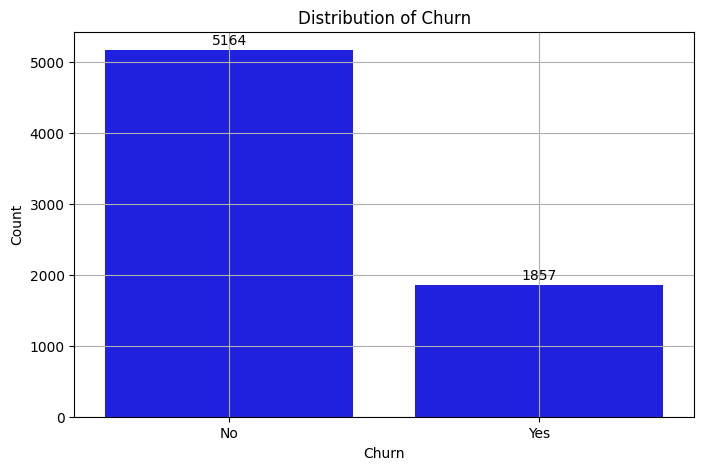

In [ ]:
# Hedef değişkenin dağılımını inceleyelim!
churn_counts = df['Churn'].value_counts()
print(churn_counts)

# Churn sınıfları için temel istatistikler
print("Churn Sınıflarının Dağılımı:")
print(df['Churn'].value_counts(normalize=True))

# 'Churn' sütununun dağılımını görselleştirelim
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Churn', data=df, color='blue')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.grid(True)

# Grafik üzerine sayıları yazdırmak için
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

**Dengesiz Sınıf Dağılımı:** Churn sütunundaki verilerde "Hayır" (%73.63) ve "Evet" (%26.37) arasında belirgin bir dengesizlik var.

 Bu dengesizlik, kullanacağımız modellerin performansını etkileyebilir, çünkü modeller genellikle daha fazla örneğe sahip sınıfa önyargılı olabilir.

 Bunun için şu yöntemleri kullanabiliriz:



**1.   Örnekleme Yöntemleri**
*   Aşırı Örnekleme (Oversampling): Azınlık olan sınıfın örnek sayısını arttırmak.
*   Eksik Örnekleme (Undersampling): Çoğunluk olan sınıfın örnek sayısını azaltmak.

**2. Algoritma Seçimi**
*   Dengesiz veri setlerinde daha iyi performans veren
*   Rastgele Orman (Random Forest) ve Gradient Boosting gibi ensemble yöntemler kullanılabilir.

**3. Performans Metriklerinin Değerlendirilmesi**
*   accuracy yerine recall precion f1 score gibi metrikler daha anlamlı sonuçlar sağlar.Çünkü dengesiz veri setlerinde accuracy doğru sonuç vermez.
*   ROC AUC skoru modelin perf. için kullanılabilir.









### **KORELASYON ANALİZİ**

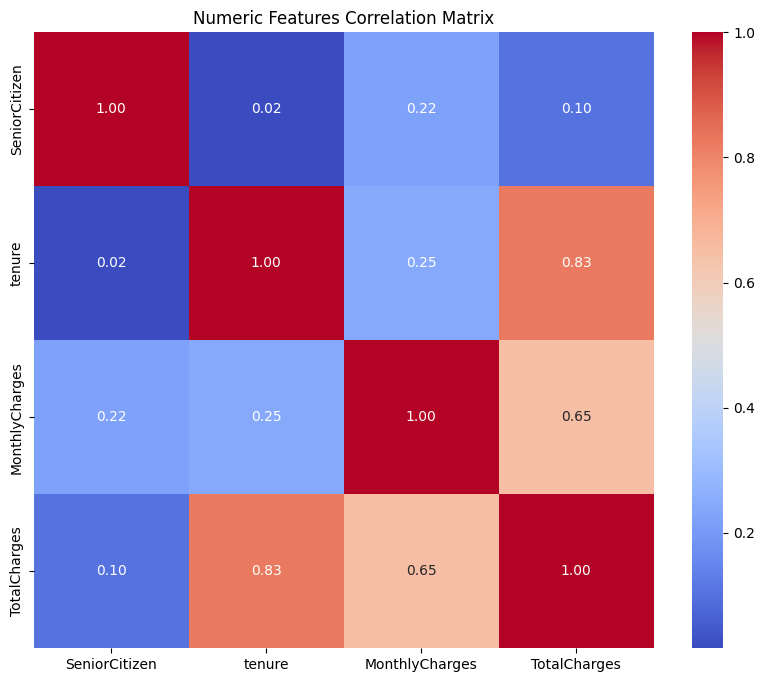

In [ ]:
# Korelasyon matrisini hesaplama
corr = df.select_dtypes(include=['float64', 'int64']).corr()

# Isı haritası ile görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Numeric Features Correlation Matrix')
plt.show()

**1. Tenure ve Total Charges:**

Bu iki özellik arasında 0.83 gibi oldukça yüksek bir korelasyon değeri var. Bu, müşterinin şirkette kaldığı sürenin artmasıyla toplam ödemesinin de arttığını gösteriyor. Uzun süreli müşteriler, genellikle daha fazla hizmet tüketiyor veya daha yüksek maliyetli hizmet paketlerine sahip olabilirler. Bu durum, müşteri sadakati ve gelir artışı arasında güçlü bir bağ olduğunu gösteriyor ve bu ilişki, müşteri kaybı tahmin modellerinde önemli bir özellik olabilir.

**2. Monthly Charges ve Total Charges:**

Bu iki değişken arasında da 0.65 gibi güçlü bir korelasyon gözlemleniyor. Aylık ödemelerin yüksek olması, toplam harcamaların artmasına neden oluyor. Bu durum, aylık ödeme miktarlarının müşteri harcamaları üzerinde önemli bir etkiye sahip olduğunu ve müşteri churn analizi için önemli bir faktör olabileceğini gösteriyor.

**3. Tenure ve Monthly Charges:**

0.25 korelasyon katsayısı, bu iki değişken arasında orta seviyede bir ilişki olduğunu gösteriyor. Müşterilerin hizmet süresi uzadıkça aylık ödemeleri de artabilir. Bu, müşterilerin zaman içinde daha fazla hizmet veya daha üst düzey paketlere geçiş yapma eğiliminde olabileceğini düşündürüyor.

**4. Senior Citizen ve diğer özellikler:**

Senior Citizen ile diğer değişkenler arasındaki korelasyonlar nispeten düşük. En yüksek korelasyon 0.22 ile Monthly Charges arasında. Bu, yaşlı müşterilerin belki de daha pahalı veya daha kapsamlı hizmet paketlerine sahip olma eğiliminde olabileceğini işaret ediyor.

### **Churn ile Korelasyonları İnceleme**

In [ ]:
# 'Churn' sütununu sayısal değere dönüştürelim
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Sadece sayısal sütunları içeren bir DataFrame oluşturalım
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Korelasyonları hesaplayalım
correlation_matrix = numerical_df.corrwith(df['Churn'])

# Churn ile diğer sayısal sütunlar arasındaki korelasyonları sıralayalım
sorted_correlations = correlation_matrix.sort_values(ascending=False)

# Sonuçları yazdıralım
print("Churn ile diğer sütunlar arasındaki korelasyonlar:")
print(sorted_correlations)

Churn ile diğer sütunlar arasındaki korelasyonlar:
Churn             1.000000
MonthlyCharges    0.194508
SeniorCitizen     0.151619
TotalCharges     -0.197198
tenure           -0.351508
dtype: float64


**Churn & MonthlyCharges (0.194508):**

'Churn' ile 'MonthlyCharges' arasında pozitif bir korelasyon var. Bu, aylık ücretler arttıkça müşterilerin hizmeti bırakma ihtimalinin arttığını gösteriyor. Yüksek aylık ücretler, müşteri memnuniyetsizliği veya rekabetçi piyasa koşulları nedeniyle müşteri kaybına yol açabilir.

**Churn & SeniorCitizen (0.151619):**

'Churn' ile 'SeniorCitizen' arasında daha düşük pozitif bir korelasyon var. Bu, yaşlı müşterilerin (Senior Citizen olarak işaretlenmiş) hizmeti bırakma olasılığının biraz daha yüksek olduğunu gösterir. Yaşlı kullanıcılar, belki de teknolojiyi kullanma konusunda yaşadıkları zorluklar veya daha uygun fiyatlı alternatiflere geçme eğilimleri nedeniyle hizmetten ayrılabilirler.

**Churn & TotalCharges (-0.197198):**

'Churn' ile 'TotalCharges' arasında negatif bir korelasyon var. Bu, toplam ücretlerin arttıkça müşterilerin hizmeti bırakma olasılığının azaldığını gösterir. Bu durum, uzun süre hizmet alan ve daha yüksek toplam ödeme yapan müşterilerin daha sadık olabileceğini düşündürmektedir.

**Churn & Tenure (-0.351508):**

'Churn' ile 'tenure' (müşteri kalıcılığı süresi) arasında en güçlü negatif korelasyon gözlemlenmektedir. Bu, müşteriler ne kadar uzun süre hizmet alırsa, hizmeti bırakma ihtimallerinin o kadar düşük olduğunu belirtir. Uzun süreli müşteriler genellikle hizmetten memnun oldukları veya değişim maliyetlerinin yüksek olması nedeniyle ayrılmayı tercih etmeyebilirler.

# VERİ MODELLEME

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter

# Veriyi eğitim ve test setlerine ayırma
X = df_copy.drop('Churn', axis=1)  # Hedef sütunu hariç tüm veriler
y = df_copy['Churn']  # Hedef sütun

# Veriyi %80 eğitim ve %20 test olacak şekilde ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y) #hedef sütun oranı korundu.

# Eğitim ve test setlerinin boyutlarını yazdırma
print("Eğitim seti boyutları: ", X_train.shape)
print(f"Eğitim setindeki churn dağılımı oranı:\n{y_train.value_counts(normalize=True)}")
print(f"Eğitim setindeki churn dağılımı sayısı:\n{y_train.value_counts()}")
print("\nTest seti boyutları: ", X_test.shape)
print(f"Test setindeki churn dağılımı oranı:\n{y_test.value_counts(normalize=True)}")
print(f"Test setindeki churn dağılımı sayısı:\n{y_test.value_counts()}")

Eğitim seti boyutları:  (5616, 45)
Eğitim setindeki churn dağılımı oranı:
Churn
0    0.735577
1    0.264423
Name: proportion, dtype: float64
Eğitim setindeki churn dağılımı sayısı:
Churn
0    4131
1    1485
Name: count, dtype: int64

Test seti boyutları:  (1405, 45)
Test setindeki churn dağılımı oranı:
Churn
0    0.735231
1    0.264769
Name: proportion, dtype: float64
Test setindeki churn dağılımı sayısı:
Churn
0    1033
1     372
Name: count, dtype: int64


Veri seti eğitim seti  ve test seti olacak şekilde %80 e %20 lik orana göre ayrıldı. İki veri setinde de churn oranının korunduğunu ve 45 öznitelik olduğu görülür.

Stratify ile eğitim ve test setlerindeki oranları koruyarak, modelin daha gerçekçi ve doğru tahminler yapması sağlandı.

Verimiz dengesiz ve churn olan (hedef sütun) azınlık sınıf olduğundan modelin bunu öğrenmesi zorlaşabilir. Bundan dolayı bütün oranı koruyarak modelin daha doğru öğrenmesini sağlamış oluruz.

**X_train** = modeli eğitmek için kullanılan özniteliklerin bulunduğu veri seti.

**y_train** = x_train ile ilişkili hedef sütundur(churn).

test verisi içinde aynı şeyler geçerlidir.

### **K-katlı çapraz doğrulama yöntemi (K-fold cross validation)**

Veri seti dengesiz olduğu için k-katlı çapraz doğrulama yöntemi kullanıldı. Çünkü bu yöntemde, her katmanda sınıfların oranları eşitlenerek daha dengeli eğitim ve test setleri oluşturulur. Bu sayede modelin, tüm sınıfları daha doğru şekilde öğrenmesi sağlanır ve genelleme yeteneği artırılır. Bu yöntem ile eğitim seti(%80) olarak ayırdığımız veri seti üzerinden doğrulama yapılır. Eğitim seti, modelin öğrenmesi ve kendini geliştirmesi için kullanılır çünkü kendi içinde k parçaya(fold) ayrılır ardından her fold, eğitim veri setinin farklı bölümlerini eğitim ve validasyon olarak kullanır.
Bu validasyon süreci, modelin eğitim sırasında gördüğü verilere fazla özgüleşip özgüleşmediğini (overfitting) kontrol etmek için önemlidir.
Çapraz doğrulama, modelin farklı veri kümelerini test ederek genel performansını daha iyi anlamamıza olanak tanır.

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Stratified K-Fold oluşturma
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# K-Fold içinde eğitim ve validasyon gruplarını inceleme
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
    print(f"Fold {fold+1}")

   # Eğitim seti bilgileri
    print(f"Eğitim seti boyutu: {len(train_idx)}")
    print(f"Eğitim setindeki churn dağılımı oranı:\n{y_train.iloc[train_idx].value_counts(normalize=True)}")
    print(f"Eğitim setindeki churn dağılımı sayısı:\n{y_train.iloc[train_idx].value_counts()}")

    # Validasyon seti bilgileri
    print(f"\nValidasyon seti boyutu: {len(val_idx)}")
    print(f"Validasyon setindeki churn dağılımı oranı:\n{y_train.iloc[val_idx].value_counts(normalize=True)}")
    print(f"Validasyon setindeki churn dağılımı sayısı:\n{y_train.iloc[val_idx].value_counts()}")

    # Genel bilgi
    print(f"\nk-fold işlemi uygulanan (%80'lik) eğitim setinin boyutu: {len(train_idx) + len(val_idx)}")
    print(f"ve churn dağılımı oranı:\n{y_train.value_counts(normalize=True)}")
    print(f"ve churn dağılımı sayısı:\n{y_train.value_counts()}")

    print("-" * 30)

Fold 1
Eğitim seti boyutu: 4492
Eğitim setindeki churn dağılımı oranı:
Churn
0    0.73553
1    0.26447
Name: proportion, dtype: float64
Eğitim setindeki churn dağılımı sayısı:
Churn
0    3304
1    1188
Name: count, dtype: int64

Validasyon seti boyutu: 1124
Validasyon setindeki churn dağılımı oranı:
Churn
0    0.735765
1    0.264235
Name: proportion, dtype: float64
Validasyon setindeki churn dağılımı sayısı:
Churn
0    827
1    297
Name: count, dtype: int64

k-fold işlemi uygulanan (%80'lik) eğitim setinin boyutu: 5616
ve churn dağılımı oranı:
Churn
0    0.735577
1    0.264423
Name: proportion, dtype: float64
ve churn dağılımı sayısı:
Churn
0    4131
1    1485
Name: count, dtype: int64
------------------------------
Fold 2
Eğitim seti boyutu: 4493
Eğitim setindeki churn dağılımı oranı:
Churn
0    0.735589
1    0.264411
Name: proportion, dtype: float64
Eğitim setindeki churn dağılımı sayısı:
Churn
0    3305
1    1188
Name: count, dtype: int64

Validasyon seti boyutu: 1123
Validasyon set

Eğitim setini 5 parçaya böldük ve churn oranının korunmasını sağladık çünkü veri seti dengesiz olduğu için yanlış öğrenme  olmaması için. Oranın korunduğuna emin olmak için ilgili kod satırı ile kontrolünü sağladık.

### Model Oluşturma ve modeli eğitme

FOLD 1
Fold 1 - SMOTE sonrası sınıf dağılımı:
0 sınıfı (churn etmeyenler): 3304 örnek (50.00%)
1 sınıfı (churn edenler): 3304 örnek (50.00%)

Fold 1 doğruluk skoru (Accuracy): 0.7447
Fold 1 kesinlik (Precision): 0.5098
Fold 1 duyarlılık (Recall): 0.8788
Fold 1 F1 Skoru: 0.6452
Fold 1 optimal threshold: 0.2766
------------------------------

FOLD 2
Fold 2 - SMOTE sonrası sınıf dağılımı:
0 sınıfı (churn etmeyenler): 3305 örnek (50.00%)
1 sınıfı (churn edenler): 3305 örnek (50.00%)

Fold 2 doğruluk skoru (Accuracy): 0.7649
Fold 2 kesinlik (Precision): 0.5403
Fold 2 duyarlılık (Recall): 0.7441
Fold 2 F1 Skoru: 0.6261
Fold 2 optimal threshold: 0.3779
------------------------------

FOLD 3
Fold 3 - SMOTE sonrası sınıf dağılımı:
0 sınıfı (churn etmeyenler): 3305 örnek (50.00%)
1 sınıfı (churn edenler): 3305 örnek (50.00%)

Fold 3 doğruluk skoru (Accuracy): 0.7640
Fold 3 kesinlik (Precision): 0.5404
Fold 3 duyarlılık (Recall): 0.7205
Fold 3 F1 Skoru: 0.6176
Fold 3 optimal threshold: 0.4117
---

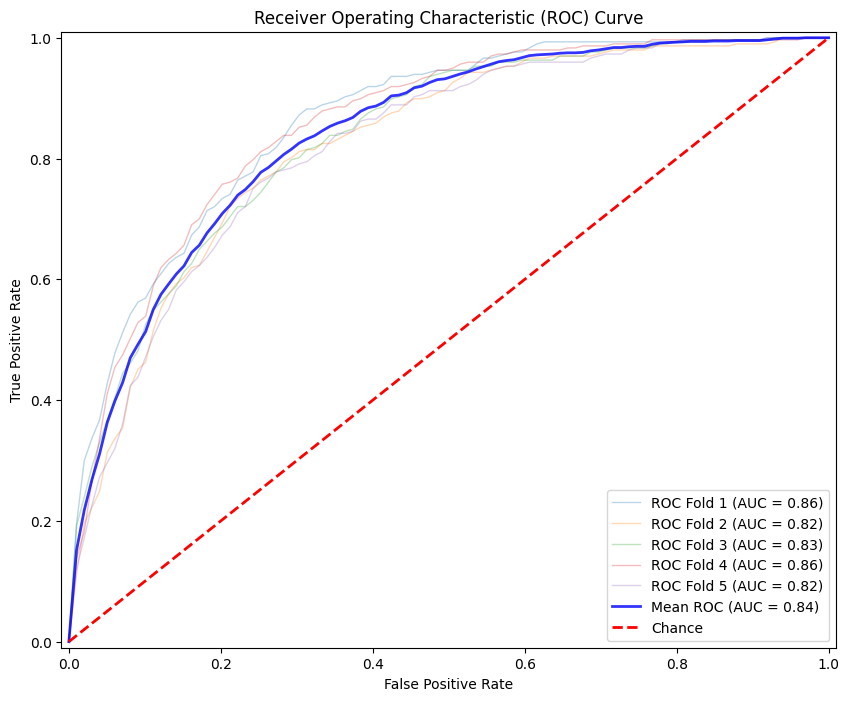

In [ ]:
from collections import Counter
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from imblearn.over_sampling import SMOTE

fold_metrics = []
mean_fpr = np.linspace(0, 1, 100)   # Ortak x-axis için
tprs = []                           # Fold'lardaki tpr'lar (interpolate edilmiş)
aucs = []
# Fold'larda bulunan optimal threshold'ları kaydetmek için liste
all_fold_optimal_thresholds = []

# K-fold çapraz doğrulama
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
    print(f"FOLD {fold+1}")

    # Eğitim ve validasyon verilerini ayır
    X_train_fold = X_train.iloc[train_idx] #değişkenlerin ne ifade ettiği aşağıda özet tablo da yazıyor.
    y_train_fold = y_train.iloc[train_idx]
    X_val_fold = X_train.iloc[val_idx]
    y_val_fold = y_train.iloc[val_idx]

    # SMOTE uygulama sadece eğitim verisine
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)

    # SMOTE uygulandıktan sonra 0 ve 1'lerin sayısını ve oranlarını yazdır
    unique, counts = np.unique(y_train_resampled, return_counts=True)
    class_distribution = dict(zip(unique, counts))

    total = counts.sum()
    class_0_count = class_distribution.get(0, 0)
    class_1_count = class_distribution.get(1, 0)

    print(f"Fold {fold+1} - SMOTE sonrası sınıf dağılımı:")
    print(f"0 sınıfı (churn etmeyenler): {class_0_count} örnek ({(class_0_count/total)*100:.2f}%)")
    print(f"1 sınıfı (churn edenler): {class_1_count} örnek ({(class_1_count/total)*100:.2f}%)")
    print()

    # Model oluşturma
    model = XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    )

    model.fit(X_train_resampled, y_train_resampled)

    # Validasyon seti üzerinde olasılık tahmini
    y_val_proba = model.predict_proba(X_val_fold)[:, 1] #Tüm satırlar ve sadece churn (1) olasılıkları alınır,
                                                        #predict_proba ->Ham olasılıkları verir(0.20, 0.80 gibi)

    # Optimal threshold bul (F1 skoruna göre)
    precision_vals, recall_vals, thresholds = precision_recall_curve(y_val_fold, y_val_proba)
    f1_scores = 2 * (precision_vals * recall_vals) / (precision_vals + recall_vals + 1e-8)
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]
    all_fold_optimal_thresholds.append(optimal_threshold)

    # Eşiğe göre tahmin
    y_val_pred = (y_val_proba >= optimal_threshold).astype(int)

    # Performans metriklerini hesapla
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    precision = precision_score(y_val_fold, y_val_pred)
    recall = recall_score(y_val_fold, y_val_pred)
    f1 = f1_score(y_val_fold, y_val_pred)
    fold_metrics.append({'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1})

    # ROC eğrisi
    fpr, tpr, _ = roc_curve(y_val_fold, y_val_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    # Sonuçları yazdır
    print(f"Fold {fold+1} doğruluk skoru (Accuracy): {accuracy:.4f}")
    print(f"Fold {fold+1} kesinlik (Precision): {precision:.4f}")
    print(f"Fold {fold+1} duyarlılık (Recall): {recall:.4f}")
    print(f"Fold {fold+1} F1 Skoru: {f1:.4f}")
    print(f"Fold {fold+1} optimal threshold: {optimal_threshold:.4f}")
    print("-" * 30)
    print()

# Tüm fold'ların ortalama metrikleri
print("Cross Validation Sonuçları:")
average_metrics = {
    'accuracy': np.mean([metric['accuracy'] for metric in fold_metrics]),
    'precision': np.mean([metric['precision'] for metric in fold_metrics]),
    'recall': np.mean([metric['recall'] for metric in fold_metrics]),
    'f1': np.mean([metric['f1'] for metric in fold_metrics]),
}

print(f"Ortalama doğruluk skoru (Accuracy): {average_metrics['accuracy']:.4f}")
print(f"Ortalama kesinlik (Precision): {average_metrics['precision']:.4f}")
print(f"Ortalama duyarlılık (Recall): {average_metrics['recall']:.4f}")
print(f"Ortalama F1 Skoru: {average_metrics['f1']:.4f}")

# ROC eğrisi çizimi
plt.figure(figsize=(10, 8))
for i, (tpr, auc_val) in enumerate(zip(tprs, aucs)):
    plt.plot(mean_fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {auc_val:.2f})')

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='b', lw=2, alpha=0.8, label=f'Mean ROC (AUC = {mean_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='r', lw=2, label='Chance')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**ROC/AUC**

AUC (Area Under the Curve) değeri, modelin rastgele tahminlerden ne kadar iyi performans gösterdiğini ölçer.

AUC Değeri, ROC eğrisinin altında kalan alanın büyüklüğüdür ve 0 ile 1 arasında değer alır. AUC değeri ne kadar yüksekse, model o kadar iyi performans göstermiş demektir. İdeal olarak, bir modelin AUC değeri 1'e yakın olmalıdır. Eğride gösterilen AUC değerleri (0.83, 0.84 gibi), modelin iyi bir ayırt edici güce sahip olduğunu gösterir, ancak mükemmel olmadığını da belirtir.

Ortalama ROC eğrisi, tüm foldlardaki ortalama performansı temsil ediyor.

Ortalama AUC değeri, modelinizin genel olarak iyi bir sınıflandırıcı olduğunu gösteriyor, çünkü 0.5 değerinin (rastgele tahmin) oldukça üzerinde bir performans sergiliyor.

ROC eğrisi, gerçek pozitif oranı (True Positive Rate, TPR) ile yanlış pozitif oranı (False Positive Rate, FPR) arasındaki ilişkiyi gösterir. Eğri, sol üst köşeye ne kadar yakınsa, model o kadar iyi performans göstermiş demektir. Eğri, sol üst köşeye yakın bir eğim sergiliyorsa, bu modelin pozitif ve negatif sınıfları iyi bir şekilde ayırt ettiğini gösterir.

**FOLDLAR**

Verilerin orantılı bir şekilde foldlara ayrıldığını gördük. Foldlar arasında overfitting belirtisi gösteren absürt ifadeler bulunmuyor.

Model genel olarak %80 oranında doğru tahminleme yapmıştır. Bu iyi bir sonuç gibi gözükse de iyileştirilebilir.

Churn olarak tahmin edilen verilerin %65 inin gerçekten churn olduğunu gösterir. !!!False pozitiflere takıldığını anlarız.!!!!! şu kısmı bir sor!!

Model, gerçekte churn olan verilerin %54 ünü doğru olarak churn diye tahminleyebilmiş. Pozitif örnekleri tahminlemede modelin başarısınını düşük olduğunu görürüz.

Kısacası modelin pozitif sınıfı (churn) tespit etmede zayıf olduğunu görmüş oluruz.

Optimal Threshold: 0.3705425262451172

Test Verisi Performansı (Threshold Uygulandı):
Accuracy: 0.7673
Precision: 0.5446
Recall: 0.7392
F1 Score: 0.6271

Detaylı Sınıflandırma Raporu:
              precision    recall  f1-score   support

 Not Churned       0.89      0.78      0.83      1033
     Churned       0.54      0.74      0.63       372

    accuracy                           0.77      1405
   macro avg       0.72      0.76      0.73      1405
weighted avg       0.80      0.77      0.78      1405



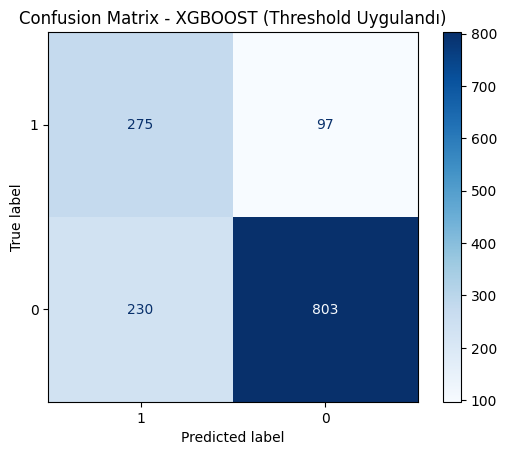

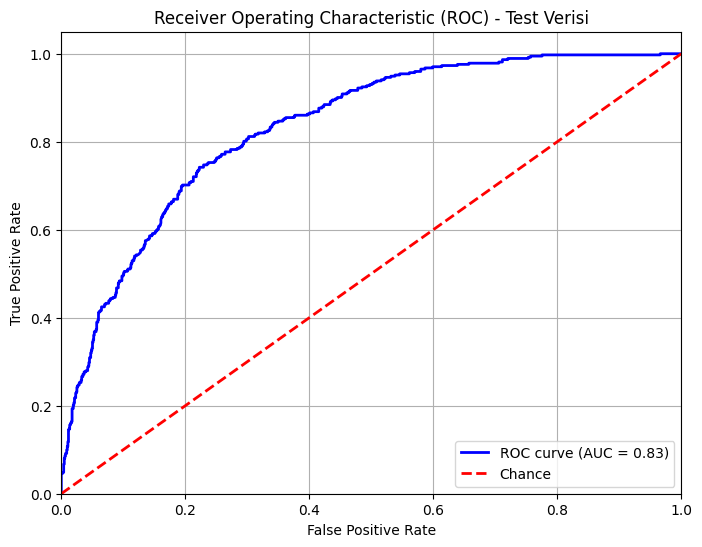

In [ ]:
#K-Fold bittikten sonra tüm eğitim verisiyle yeni model eğitimi
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    precision_recall_curve, roc_curve, auc
)

#Yeniden model oluşturma
final_model = XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
)

#X_train ve y_train üzerinde SMOTE uygulamak
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Final modelin eğitilmesi
final_model.fit(X_train_resampled, y_train_resampled)

#Test seti tahmini
y_test_proba = final_model.predict_proba(X_test)[:, 1]

#Ortalama threshold (K-Fold sırasında bulunan tüm optimal threshold değerlerinin ortalaması)
optimal_threshold = np.mean(all_fold_optimal_thresholds)

#Ortalama threshold'a göre sınıflandırma yap
y_test_pred = (y_test_proba >= optimal_threshold).astype(int)

#Performans metriklerini hesapla
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

#Sonuçları yazdır
print(f"Optimal Threshold: {optimal_threshold}")
print("\nTest Verisi Performansı (Threshold Uygulandı):")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

#Detaylı sınıflandırma raporu
print("\nDetaylı Sınıflandırma Raporu:")
print(classification_report(y_test, y_test_pred, target_names=['Not Churned', 'Churned']))

#Confusion Matrix Görselleştirme
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, labels=[1, 0], cmap=plt.cm.Blues)
plt.title("Confusion Matrix - XGBOOST (Threshold Uygulandı)")
plt.show()
print()

# ROC eğrisi ve AUC değeri
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# ROC eğrisi görselleştirme
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--', label='Chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Verisi')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Model test setindeki doğru örneklerin %79 unu doğru tahmin edebilmiş.

Churn olan verilerin %64 ünü gerçekten churn olarak tahmin edebilmiş. Yani (195 + 107) veriden 195 tanesini gerçekte churn olarak tahminlemiş. Geriye 107 veriyi yanlışlıkla churn olarak tahminlenmiş.

Gerçekte churn olan verilerin ise %52 si model tarafından doğru olarak churn tahmin edilmiş. (195 +  177) verinin 195 tanesini churn olarak sınıflandırabilmiş. 177 veriyi yanlışlık churn değil olarak sınıflandırmıştır. Buradan modelin hassasiyetin düşük olduğunu anlayabiliriz. Pozitif olan çoğu örneği yanlış tahminlemiştir. Model churn olan veriler için daha iyileştirilebilir hale gelmeli.

**Churn değil (0)**

Model, churn olmayan verilerin (926 + 177) %84 ünü gerçekten churn değil(926) diyebilmiş. Negatif tahminlerde doğruluğu yüksek denilebilir ama churn olan 177 veriye yanlışlıkla churn değil demiş.
Gerçekte churn olmayan verilerin (107 + 926) ise %90 ına doğru bir şekilde tahminlemiş yani churn değil(926) diyebilmiş. Negatif tahminlemede doğruluk oranının yüksek olduğunu anlayabiliriz.

**Churn (1)**

Model, churn olan verilerin(195 + 107) %65 ine gerçekte churn(195) diye tahminleyebilmiş. Pozitif tahminlerin doğruluğu düşüktür. Geriye kalan 107 veriye yanlışlıkla churn demiş.
Gerçekte churn olan verilerin(195 + 177) %52 sini churn(195) olarak doğru tahminleyebilmiş. 177 veriye ise yanlışlıkla churn değil demiş. Pozitif verileri tahminlemede gözden kaçırdığını, modelin performansının düşük olduğunu görürüz. Pozitif örnekleri daha doğru şekilde genelleyebilmesi için modelin geliştirilmeye ihtiyacı vardır.

Model genel olarak negatif sınıfları iyi şekilde tespit ederken, pozitif sınıfları tespit etmede zorlanmıştır. Bu, özellikle pozitif sınıfın daha nadir görülmesinden veya modelin pozitif ve negatif sınıfları arasındaki farkları yeterince öğrenememesinden kaynaklanabilir. Bunun için modele gerekli iyileştirmeli yapılmalı.



<ipython-input-120-bcd31ac4e326>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Churn', y='Count', data=pre_df, ax=axs[0], palette='Blues_d')
<ipython-input-120-bcd31ac4e326>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Churn', y='Count', data=post_df, ax=axs[1], palette='Greens_d')


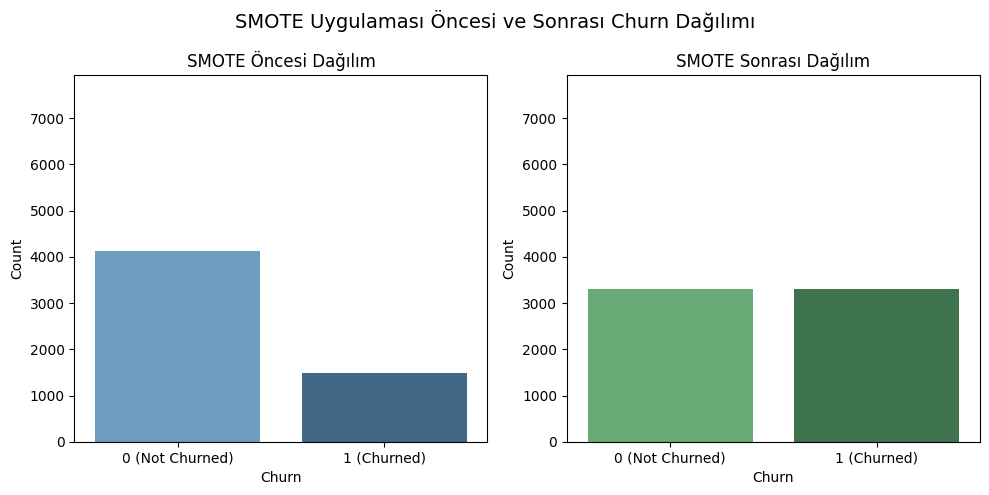

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SMOTE öncesi sınıf dağılımı
original_counts = pd.Series([5164, 1857], index=['No (0)', 'Yes (1)'])

# SMOTE sonrası sınıf dağılımı (sentetik verilerle dengelenmiş)
smote_counts = pd.Series([5164, 5164], index=['No (0)', 'Yes (1)'])

# Verileri DataFrame'e dönüştür
pre_df = pd.DataFrame(pre_smote_counts)
post_df = pd.DataFrame(post_smote_counts)

# Grafik çizimi
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x='Churn', y='Count', data=pre_df, ax=axs[0], palette='Blues_d')
axs[0].set_title('SMOTE Öncesi Dağılım')
axs[0].set_ylim(0, max(pre_df['Count'] + post_df['Count']) + 500)

sns.barplot(x='Churn', y='Count', data=post_df, ax=axs[1], palette='Greens_d')
axs[1].set_title('SMOTE Sonrası Dağılım')
axs[1].set_ylim(0, max(pre_df['Count'] + post_df['Count']) + 500)

fig.suptitle('SMOTE Uygulaması Öncesi ve Sonrası Churn Dağılımı', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()
